In [491]:
import os
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
path = "/Users/chereowang27/NYCDSA/Capstone/NYCDSA_Capstone/Cherie"
os.chdir(path)
cwd = os.getcwd()
print("Current working directory: {0}".format(cwd))

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import bamboolib
import numpy as np

In [493]:
#Read in acs cleaned dataset with engineered features
df_final0 = pd.read_csv("./data/data_final_w_lagged_targets_kpl.csv",index_col=None)

In [3]:
df_final0.head()

,year,zipcode,City,CountyName,Metro,avg_rent,female_19_under,female_20_to_29,female_30_to_39,female_40_to_64,female_64_over,male_19_under,male_20_to_29,male_30_to_39,male_40_to_64,male_64_over,commute_30_mins_less,commute_30_to_59,commute_60_more_mins,income_less_10000,income_10000_39999,income_40000_99999,income_100000_199999,income_200000_or_more,degree_associates,degree_bachelors,degree_graduate_professional,mobile_homes,unemployed_pop,vacant_housing_units,vacant_housing_units_for_rent,housing_units,amerindian_pop,asian_pop,black_pop,hispanic_pop,other_race_pop,white_pop,dwellings_1_unit,dwellings_2_to_49_units,dwellings_50_or_more_units,commuters_by_public_transportation,commuters_walked_to_work,households_public_asst_or_food_stamps,households,housing_built_1939_or_earlier,housing_built_2000_to_2004,housing_built_2005_or_later,N_returns_real_estate_taxes,Real_estate_taxes_amount,N_returns_mortgage_interest_paid,Mortgage_interest_paid_amount,rank_gini_index,gini_index_pct_change,gen_rank,CSBA,permits_total,permits_multifamilies,permits_singlefamily,rent_in_1y,rent_in_2y,rent_in_3y,rent_in_4y,rent_in_5y
0,2013,94109,San Francisco,San Francisco County,San Francisco-Oakland-Hayward,3747.083333,0.038311,0.146598,0.098579,0.126137,0.088690,0.036762,0.108071,0.115852,0.171329,0.069670,0.313334,0.179956,0.064014,0.055188,0.169401,0.176768,0.129325,0.070282,0.045408,0.321800,0.184117,0.001031,0.044489,0.094573,0.029824,0.663737,0.000522,0.279346,0.033592,0.102307,0.015526,0.539131,0.034844,0.684668,0.278480,0.225616,0.146130,0.050412,0.600965,0.603528,0.032754,0.000434,4190.0,36728.0,3260.0,48733.0,681.0,-0.025946,533.000000,41860.0,10922.0,7263.0,3659.0,4123.250000,4520.250000,4492.916667,4231.416667,4245.916667
1,2014,94109,San Francisco,San Francisco County,San Francisco-Oakland-Hayward,4123.250000,0.028940,0.141141,0.097703,0.127501,0.080996,0.036938,0.109005,0.130222,0.172455,0.075099,0.320278,0.185181,0.069438,0.054430,0.166046,0.169387,0.134294,0.077527,0.042963,0.343595,0.189198,0.000550,0.039348,0.093502,0.023603,0.663745,0.000292,0.271838,0.040553,0.096023,0.010572,0.546304,0.030947,0.685794,0.282185,0.232818,0.151987,0.057992,0.601683,0.592017,0.038842,0.000413,4160.0,39773.0,3190.0,47822.0,474.0,0.000750,254.333333,41860.0,10001.0,6285.0,3716.0,4520.250000,4492.916667,4231.416667,4245.916667,4421.083333
2,2015,94109,San Francisco,San Francisco County,San Francisco-Oakland-Hayward,4520.250000,0.029400,0.135949,0.105821,0.123141,0.082728,0.035919,0.106443,0.137299,0.169435,0.073864,0.317038,0.192102,0.075516,0.049811,0.153447,0.172828,0.142238,0.080703,0.041497,0.345052,0.205478,0.000459,0.029720,0.089852,0.018192,0.658164,0.000231,0.267209,0.041604,0.096708,0.009344,0.551276,0.034575,0.679325,0.284885,0.226582,0.156556,0.056226,0.599027,0.047746,0.002969,0.000270,4280.0,43679.0,3230.0,48895.0,315.0,0.010684,239.666667,41860.0,13386.0,8582.0,4804.0,4492.916667,4231.416667,4245.916667,4421.083333,4406.000000
3,2016,94109,San Francisco,San Francisco County,San Francisco-Oakland-Hayward,4492.916667,0.027901,0.146379,0.105018,0.120388,0.084793,0.033846,0.103072,0.138453,0.160838,0.079312,0.318446,0.200646,0.078795,0.051643,0.153930,0.159232,0.144879,0.092433,0.038987,0.341795,0.207215,0.000430,0.027616,0.094035,0.025758,0.664614,0.000589,0.258930,0.039897,0.104839,0.006159,0.554883,0.028525,0.675942,0.294432,0.232314,0.160874,0.055559,0.602117,0.051033,0.004781,0.002471,4280.0,48090.0,3210.0,47713.0,299.0,0.010200,303.333333,41860.0,14787.0,9820.0,4967.0,4231.416667,4245.916667,4421.083333,4406.000000,NaN
4,2017,94109,San Francisco,San Francisco County,San Francisco-Oakland-Hayward,4231.416667,0.026190,0.131302,0.108329,0.122007,0.085002,0.039514,0.099599,0.146801,0.160426,0.080831,0.321540,0.210702,0.073091,0.042660,0.140863,0.148338,0.144609,0.109760,0.032181,0.346846,0.222542,0.000406,0.028452,0.102923,0.030639,0.653489,0.000424,0.255854,0.040115,0.103186,0.006309,0.561754,0.027881,0.686795,0.284296,0.230017,0.177161,0.052

In [494]:
# n unique zipcodes total = 764, and check count of unique zipcodes in different zipcodes
print(df_final0['zipcode'].nunique())
# drop variables not used in the analysis for now
df_final = df_final0.drop(['rent_in_2y','rent_in_3y','rent_in_4y','rent_in_5y'], axis = 1)

# there are missing gini_rank and rank_gini_index, gini_index_pct_change. drop for now. 
df_final = df_final.dropna(axis = 0) \
                    .reset_index()  \
                    .drop(["index"], axis = 1)
df_final.groupby('year')['zipcode','gen_rank', 'rank_gini_index','gini_index_pct_change', 'CSBA','permits_total','permits_multifamilies', 
                         'rent_in_1y', ].count()

764


,zipcode,gen_rank,rank_gini_index,gini_index_pct_change,CSBA,permits_total,permits_multifamilies,rent_in_1y
year,,,,,,,,
2013,751,751,751,751,751,751,751,751
2014,751,751,751,751,751,751,751,751
2015,751,751,751,751,751,751,751,751
2016,761,761,761,761,761,761,761,761
2017,751,751,751,751,751,751,751,751
2018,752,752,752,752,752,752,752,752


In [55]:
df_final

,year,zipcode,City,CountyName,Metro,avg_rent,female_19_under,female_20_to_29,female_30_to_39,female_40_to_64,female_64_over,male_19_under,male_20_to_29,male_30_to_39,male_40_to_64,male_64_over,commute_30_mins_less,commute_30_to_59,commute_60_more_mins,income_less_10000,income_10000_39999,income_40000_99999,income_100000_199999,income_200000_or_more,degree_associates,degree_bachelors,degree_graduate_professional,mobile_homes,unemployed_pop,vacant_housing_units,vacant_housing_units_for_rent,housing_units,amerindian_pop,asian_pop,black_pop,hispanic_pop,other_race_pop,white_pop,dwellings_1_unit,dwellings_2_to_49_units,dwellings_50_or_more_units,commuters_by_public_transportation,commuters_walked_to_work,households_public_asst_or_food_stamps,households,housing_built_1939_or_earlier,housing_built_2000_to_2004,housing_built_2005_or_later,N_returns_real_estate_taxes,Real_estate_taxes_amount,N_returns_mortgage_interest_paid,Mortgage_interest_paid_amount,rank_gini_index,gini_index_pct_change,gen_rank,CSBA,permits_total,permits_multifamilies,permits_singlefamily,rent_in_1y
0,2013,94109,San Francisco,San Francisco County,San Francisco-Oakland-Hayward,3747.083333,0.038311,0.146598,0.098579,0.126137,0.088690,0.036762,0.108071,0.115852,0.171329,0.069670,0.313334,0.179956,0.064014,0.055188,0.169401,0.176768,0.129325,0.070282,0.045408,0.321800,0.184117,0.001031,0.044489,0.094573,0.029824,0.663737,0.000522,0.279346,0.033592,0.102307,0.015526,0.539131,0.034844,0.684668,0.278480,0.225616,0.146130,0.050412,0.600965,0.603528,0.032754,0.000434,4190.0,36728.0,3260.0,48733.0,681.0,-0.025946,533.000000,41860.0,10922.0,7263.0,3659.0,4123.250000
1,2014,94109,San Francisco,San Francisco County,San Francisco-Oakland-Hayward,4123.250000,0.028940,0.141141,0.097703,0.127501,0.080996,0.036938,0.109005,0.130222,0.172455,0.075099,0.320278,0.185181,0.069438,0.054430,0.166046,0.169387,0.134294,0.077527,0.042963,0.343595,0.189198,0.000550,0.039348,0.093502,0.023603,0.663745,0.000292,0.271838,0.040553,0.096023,0.010572,0.546304,0.030947,0.685794,0.282185,0.232818,0.151987,0.057992,0.601683,0.592017,0.038842,0.000413,4160.0,39773.0,3190.0,47822.0,474.0,0.000750,254.333333,41860.0,10001.0,6285.0,3716.0,4520.250000
2,2015,94109,San Francisco,San Francisco County,San Francisco-Oakland-Hayward,4520.250000,0.029400,0.135949,0.105821,0.123141,0.082728,0.035919,0.106443,0.137299,0.169435,0.073864,0.317038,0.192102,0.075516,0.049811,0.153447,0.172828,0.142238,0.080703,0.041497,0.345052,0.205478,0.000459,0.029720,0.089852,0.018192,0.658164,0.000231,0.267209,0.041604,0.096708,0.009344,0.551276,0.034575,0.679325,0.284885,0.226582,0.156556,0.056226,0.599027,0.047746,0.002969,0.000270,4280.0,43679.0,3230.0,48895.0,315.0,0.010684,239.666667,41860.0,13386.0,8582.0,4804.0,4492.916667
3,2016,94109,San Francisco,San Francisco County,San Francisco-Oakland-Hayward,4492.916667,0.027901,0.146379,0.105018,0.120388,0.084793,0.033846,0.103072,0.138453,0.160838,0.079312,0.318446,0.200646,0.078795,0.051643,0.153930,0.159232,0.144879,0.092433,0.038987,0.341795,0.207215,0.000430,0.027616,0.094035,0.025758,0.664614,0.000589,0.258930,0.039897,0.104839,0.006159,0.554883,0.028525,0.675942,0.294432,0.232314,0.160874,0.055559,0.602117,0.051033,0.004781,0.002471,4280.0,48090.0,3210.0,47713.0,299.0,0.010200,303.333333,41860.0,14787.0,9820.0,4967.0,4231.416667
4,2017,94109,San Francisco,San Francisco County,San Francisco-Oakland-Hayward,4231.416667,0.026190,0.131302,0.108329,0.122007,0.085002,0.039514,0.099599,0.146801,0.160426,0.080831,0.321540,0.210702,0.073091,0.042660,0.140863,0.148338,0.144609,0.109760,0.032181,0.346846,0.222542,0.000406,0.028452,0.102923,0.030639,0.653489,0.000424,0.255854,0.040115,0.103186,0.006309,0.561754,0.027881,0.686795,0.284296,0.230017,0.177161,0.052332,0.586230,0.046946,0.007464,0.002380,4430.0,59023.0,3370.0,51307.0,578.0,-0.013035,346.666667,41860.0,16952.0,12175.0,4777.0,4245.916667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [71]:
list(df_final.columns)

['year',
 'zipcode',
 'City',
 'CountyName',
 'Metro',
 'avg_rent',
 'female_19_under',
 'female_20_to_29',
 'female_30_to_39',
 'female_40_to_64',
 'female_64_over',
 'male_19_under',
 'male_20_to_29',
 'male_30_to_39',
 'male_40_to_64',
 'male_64_over',
 'commute_30_mins_less',
 'commute_30_to_59',
 'commute_60_more_mins',
 'income_less_10000',
 'income_10000_39999',
 'income_40000_99999',
 'income_100000_199999',
 'income_200000_or_more',
 'degree_associates',
 'degree_bachelors',
 'degree_graduate_professional',
 'mobile_homes',
 'unemployed_pop',
 'vacant_housing_units',
 'vacant_housing_units_for_rent',
 'housing_units',
 'amerindian_pop',
 'asian_pop',
 'black_pop',
 'hispanic_pop',
 'other_race_pop',
 'white_pop',
 'dwellings_1_unit',
 'dwellings_2_to_49_units',
 'dwellings_50_or_more_units',
 'commuters_by_public_transportation',
 'commuters_walked_to_work',
 'households_public_asst_or_food_stamps',
 'households',
 'housing_built_1939_or_earlier',
 'housing_built_2000_to_2004'

In [495]:
# drop target variables and previous year's rent from features.
# Extra location identifiers are also dropped. 
X = df_final.drop(['avg_rent','rent_in_1y', 'City','CountyName', 'Metro'], axis = 1)
# Drop zipcode, 
y = df_final['rent_in_1y']
y
print(y.shape)
print(X.shape)

(4517,)
(4517, 55)


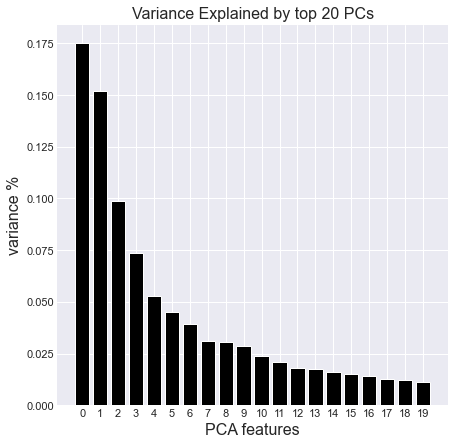

In [503]:
# (1) fit a pca with data. 
# (2) The cluster with PCs controlling for 'year' using Kmeans
# 
#import libraies
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Standardize the data to have a mean of 0 and a variance of 1
X_std = StandardScaler().fit_transform(X)

# Create a PCA instance: pca
pca = PCA(n_components = 20)
pc = pca.fit_transform(X_std)

# plot explained variances
features = range(pca.n_components_)
# Set the size of the figure 
fig,axis = plt.subplots(1,1,figsize = (7,7))
plt.bar(features, pca.explained_variance_ratio_, color = 'black')
plt.xlabel('PCA features', fontsize = 16)
plt.ylabel('variance %', fontsize = 16)
plt.xticks(features)
plt.title('Variance Explained by top 20 PCs', fontsize = 16)

# Save components to a DataFrame
PCs = pd.DataFrame(pc)

In [10]:
print(PCs.shape)
print(X.shape)
PCs.columns = [str(column) for column in PCs.columns]
PCs

(4517, 20)
(4517, 55)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2.984120,10.957114,-1.309203,-3.498114,-0.478177,-2.415964,3.269823,-1.550095,-0.341506,1.787028,0.145617,0.868091,0.232777,-0.455734,0.872093,-1.008302,-2.389514,0.281180,3.135751,-0.340566
1,3.362933,10.983843,-1.530610,-3.637720,-0.354623,-0.174891,3.384762,-1.335086,-0.285744,1.548599,0.443089,1.671361,-0.249937,0.148099,0.028929,-0.511165,-1.909894,0.858920,2.693757,-0.703806
2,3.915690,10.175755,-1.796783,-3.348456,0.598239,0.796902,1.652382,-0.197546,0.182332,2.032184,1.506407,2.262822,-0.796161,-0.923627,0.686880,-0.893210,-0.520021,0.515622,0.042119,0.183575
3,3.927367,10.384232,-1.980680,-3.120784,0.996120,0.678482,1.629687,0.141312,-0.260329,2.134167,1.738798,2.467424,-0.975346,-0.702219,0.031509,-0.373231,-0.170317,0.436736,-0.068112,0.155285
4,4.269295,10.243004,-2.588564,-2.996969,1.572246,-0.676586,1.806992,0.423208,-0.838770,1.999613,1.579383,2.725945,-0.845403,-0.518226,0.211632,-0.601151,0.122014,0.402656,-0.256750,0.004304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4512,-1.981740,0.739832,5.912785,0.938370,-0.759761,-2.774395,0.182203,0.439478,-1.128299,-0.971084,-1.694273,0.012247,0.541508,-0.150676,-1.871468,-1.056503,1.249968,-0.186122,0.536000,0.353937
4513,-2.565691,0.899681,5.598428,1.322437,-1.271417,1.065630,0.477181,0.108388,-1.433274,-0.869958,-1.934359,0.209549,0.723144,0.151196,-1.547241,-0.958312,1.442516,0.014930,0.235232,0.053482
4514,-1.724394,0.909636,5.554574,2.445765,2.041956,-3.289239,-0.411950,-0.231360,-1.202831,-0.177590,-2.170564,-0.333195,0.706484,0.668780,-1.722205,-0.925621,1.064068,-0.303521,0.400820,-0.671988
4515,2.726951,3.253161,12.120019,0.961822,-1.154961,-4.301261,-1.647136,6.437289,-1.510983,-0.724488,-3.165213,8.626300,14.535118,2.748892,-5.582261,-2.423217,-2.787594,-1.579406,0.446980,-0.882950


In [505]:
n = X.shape[0]
m = X.shape[1]
n_pc = 4
X1 = pd.concat([X, PCs.reindex(X.index)], axis = 1)
corr0 = pd.DataFrame(X1.corr().iloc[0:m,m:m+n_pc].reset_index())
old_names = corr0.columns.to_list()

nums = list(range(n_pc+1))
nums = [str(x) for x in nums]
new_names = ["pc" + x for x in nums]

col_dict = dict(zip(old_names, new_names))
col_dict['index'] = 'Feature'
corr0 = corr0.rename(columns = col_dict)

corr0.columns = [str(column) for column in corr0.columns]

In [509]:
pc1_sorted = corr0.reindex(corr0.pc1.abs().sort_values(ascending = False).index)[['Feature','pc1']]
pres = pc1_sorted[pc1_sorted['pc1']>.50]
pres

,Feature,pc1
18,income_100000_199999,0.867354
21,degree_bachelors,0.848612
22,degree_graduate_professional,0.803491
19,income_200000_or_more,0.781138
33,white_pop,0.769114
40,households,0.627659
45,Real_estate_taxes_amount,0.621274
11,male_64_over,0.598330
5,female_40_to_64,0.591101
6,female_64_over,0.543091


In [511]:
pc2_sorted = corr0.reindex(corr0.pc2.abs().sort_values(ascending = False).index)[['Feature','pc2']]
pres = pc2_sorted[abs(pc2_sorted["pc2"])>=.50]
pres


,Feature,pc2
34,dwellings_1_unit,-0.867404
35,dwellings_2_to_49_units,0.720673
15,income_less_10000,0.717008
40,households,0.686547
9,male_30_to_39,0.668428
7,male_19_under,-0.657024
38,commuters_walked_to_work,0.656984
36,dwellings_50_or_more_units,0.654985
16,income_10000_39999,0.633245
2,female_19_under,-0.630509


In [29]:
pc3_sorted = corr0.reindex(corr0.pc3.abs().sort_values(ascending = False).index)[['var','pc3']]
pc3_sorted[abs(pc3_sorted["pc3"])>=.50]

,var,pc3
53,permits_multifamilies,-0.570425
52,permits_total,-0.542711


In [34]:
pc4_sorted = corr0.reindex(corr0.pc4.abs().sort_values(ascending = False).index)[['var','pc4']]
pc4_sorted[abs(pc4_sorted["pc4"])>=.50]

,var,pc4
52,permits_total,0.675376
51,CSBA,-0.661168
54,permits_singlefamily,0.657590
53,permits_multifamilies,0.600659


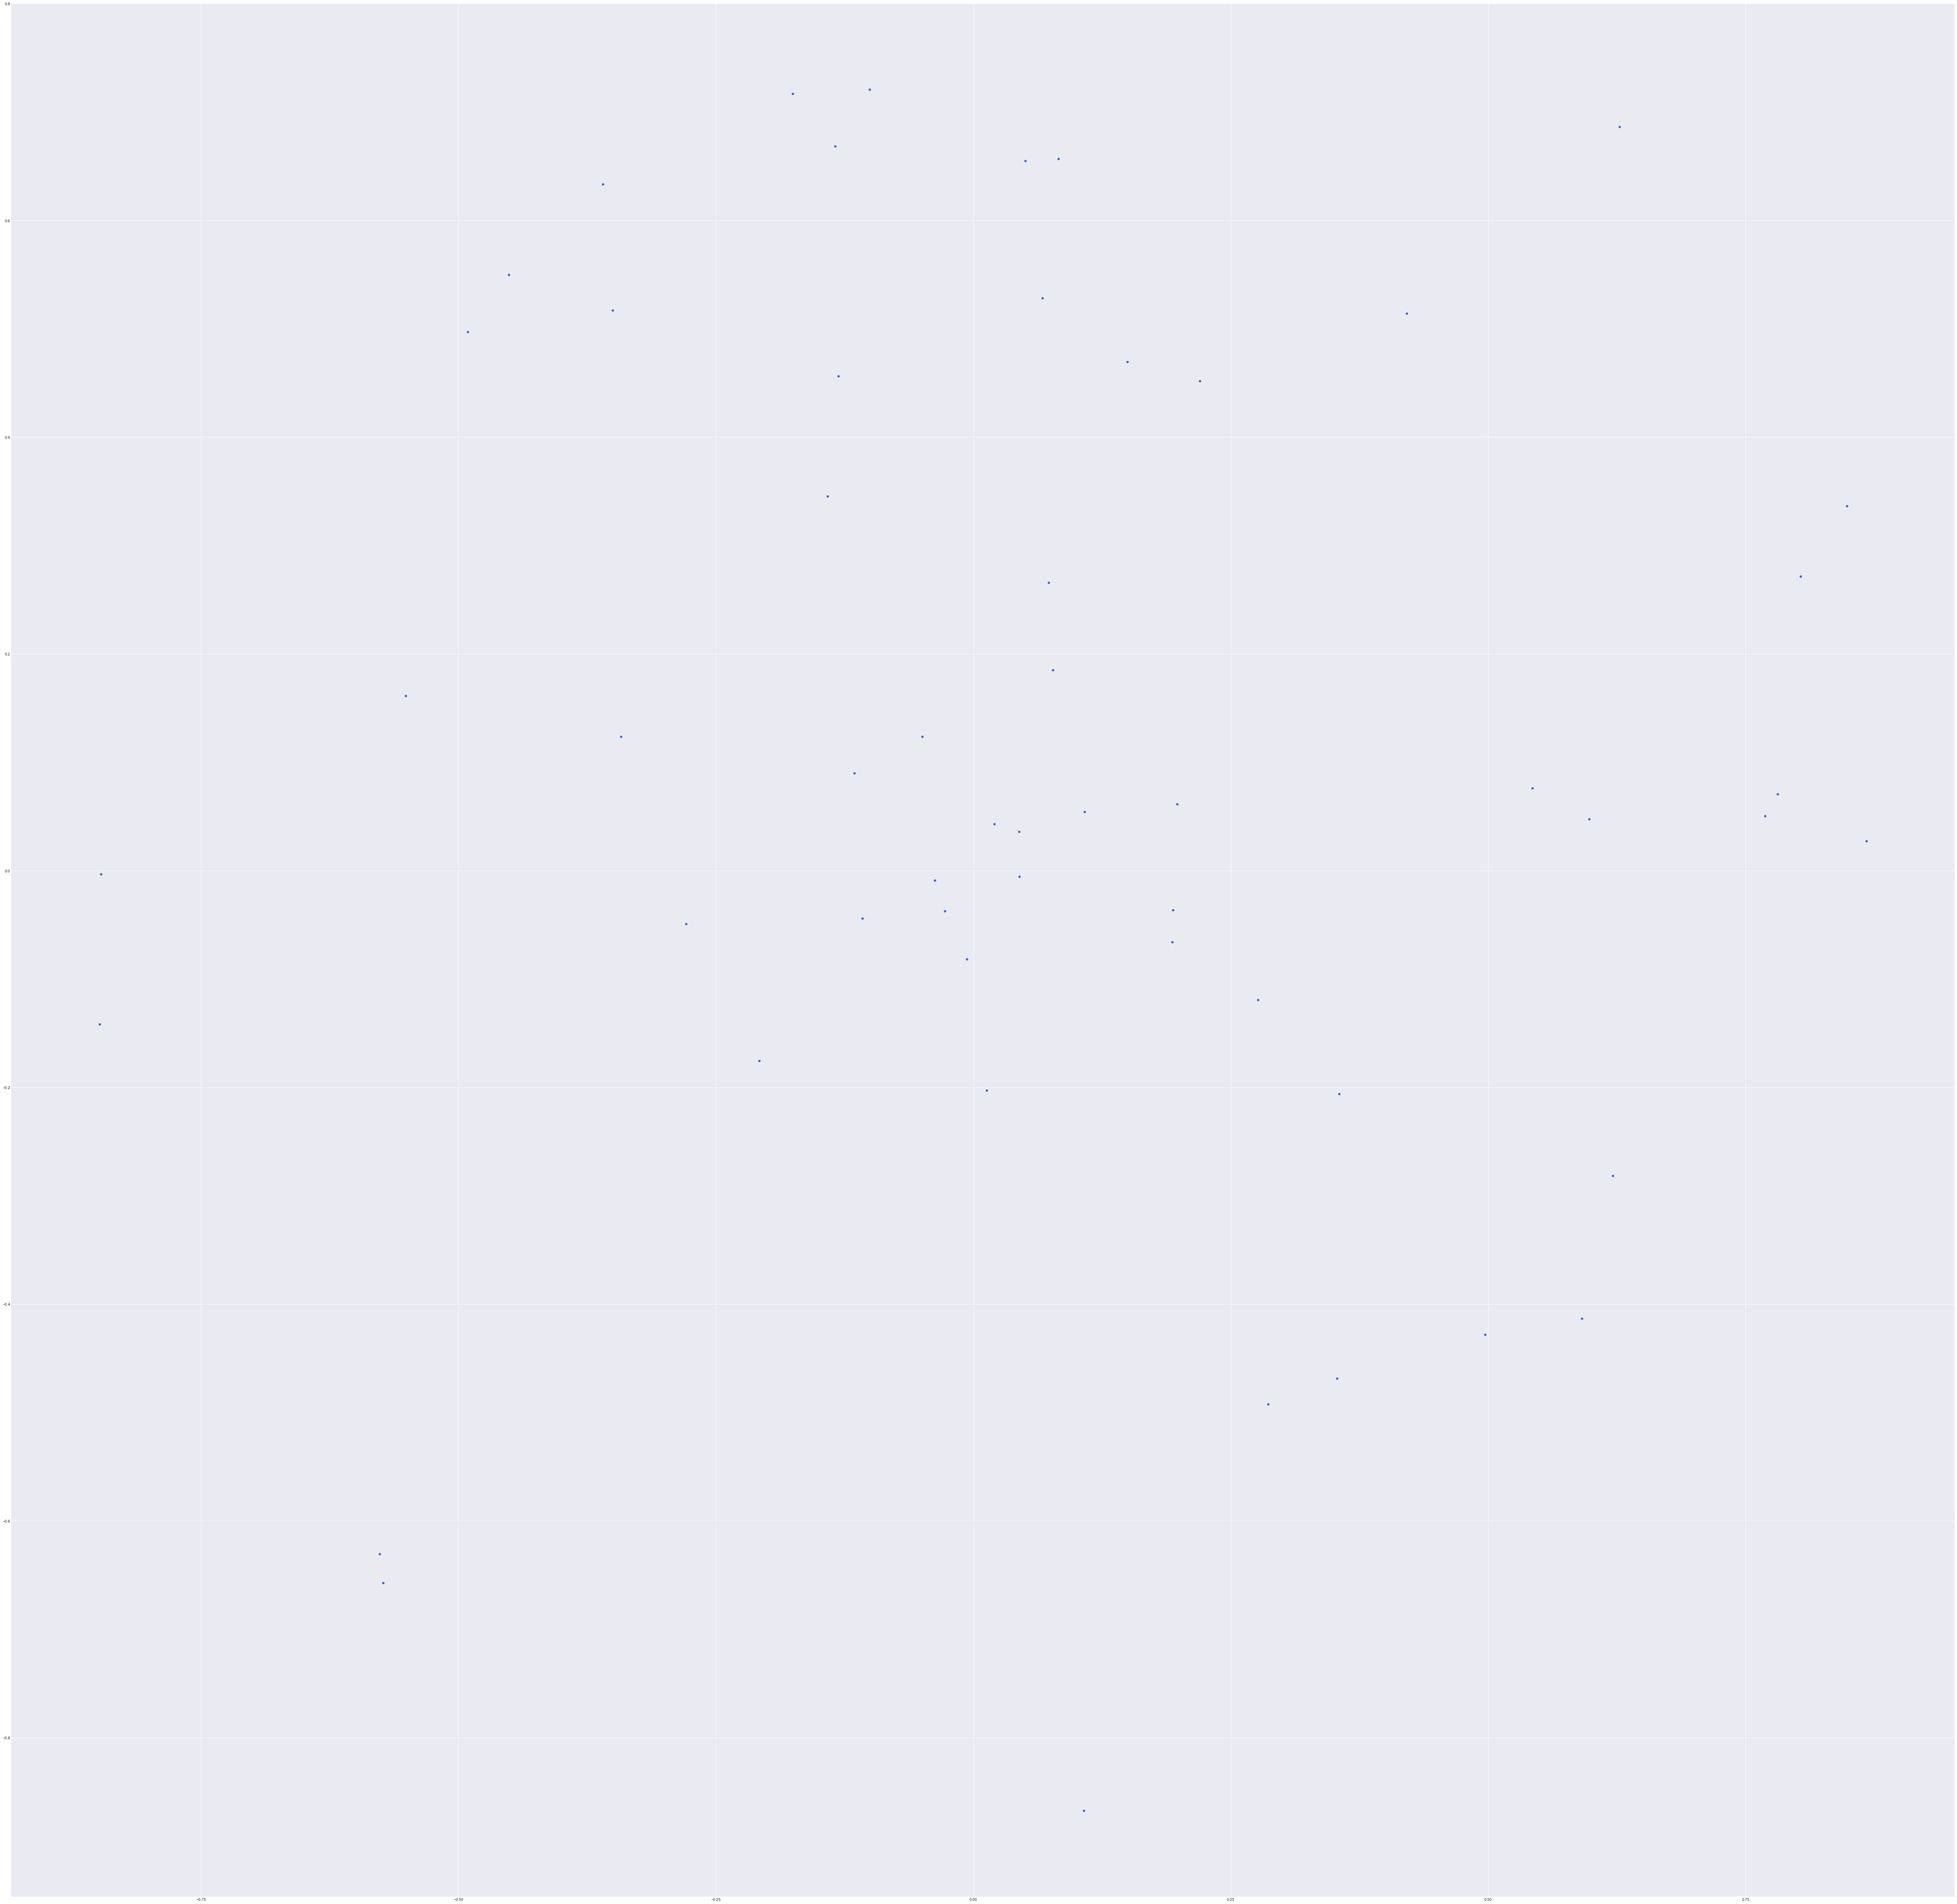

In [517]:
plt.scatter(corr0['pc1'], corr0['pc2'])

In [39]:
import plotly.express as px
fig = px.scatter_3d(corr0, x = 'pc1', y = 'pc2', z = 'pc3')
fig.show()

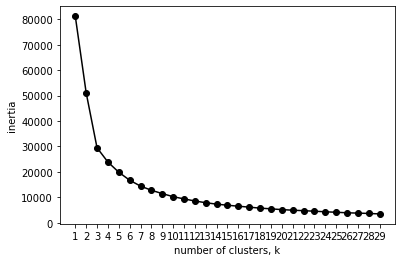

In [75]:
# find clusters using PCs
ks = range(1,30)
inertias = []
n = n_pc
for k in ks: 
    #create a KMeans instance with k clusters: model
    model = KMeans(n_clusters = k)
    #fit model to samples
    model.fit(PCs.iloc[:, :2])
    #append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o',color = 'black')
plt.xlabel("number of clusters, k")
plt.ylabel("inertia")
plt.xticks(ks)
plt.show()

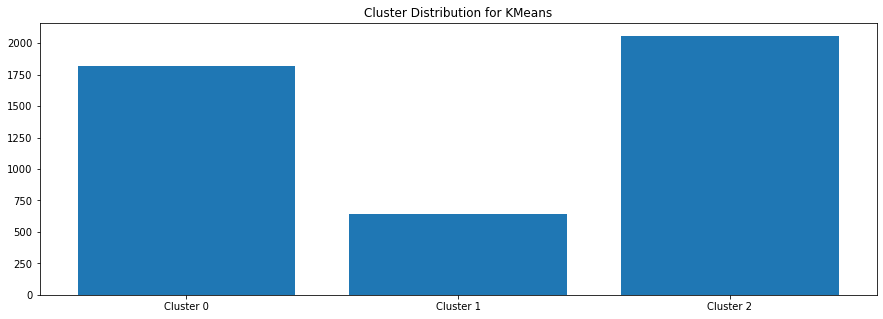

In [76]:
# It seems the data could be divided into 4 clusters.
# Now run kmeans cluster on the original data using variables 
# highly correlated with the 1st 3 PCs. This allows 
# me to recover the label the original dataset

n_clusters = 3
model = KMeans(n_clusters)
labels = model.fit_predict((PCs.iloc[:, :2]))
#convert labels to a dataframe
df_labels = pd.DataFrame(labels, columns = ["cluster"])

cluster_c = [len(labels[labels == i]) for i in range(n_clusters)] 
cluster_n = ["Cluster "+str(i) for i in range(n_clusters)]
plt.figure(figsize = (15,5))
plt.title("Cluster Distribution for KMeans")
plt.bar(cluster_n, cluster_c)
plt.show()

In [77]:
print(len(df_labels))
print(len(df_final))

4517
4517


In [241]:
df_labeled0 = pd.concat([df_final, df_labels], axis = 1)
df_labeled0['cluster'].unique()

array([1, 0, 2], dtype=int32)

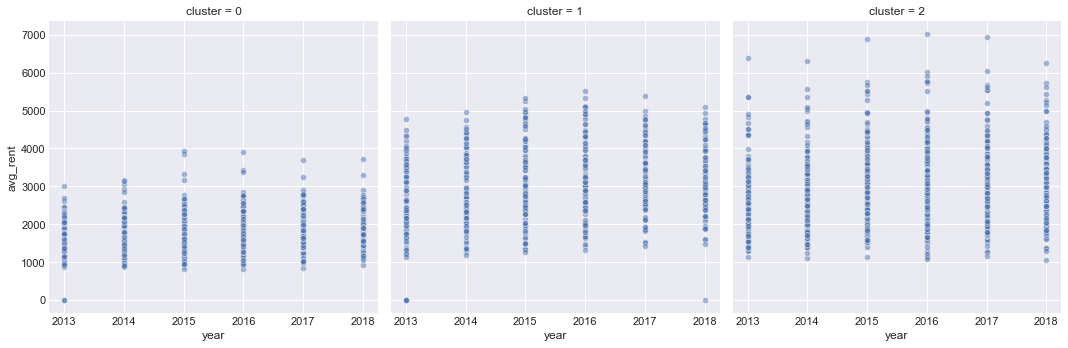

In [265]:
# now plot the time series trend of rental price by cluster

# plot historical rent vs. rent in 1 year by cluster
sns.relplot(data = df_labeled0, x ="year", 
                               y = "avg_rent",
                               col = "cluster",
                               alpha = 0.5)


#Identifies outliers on the plot and remove outliers before calculating mean median rent in a scatter

In [391]:
#remove outliers: 
#remove observations where avg_rent is 0; 
df_labeled = df_labeled0.loc[~(df_labeled0['avg_rent']== 0)]
#remove outliers of each year in cluster 0 and cluster 2
def is_outlier(s):
    lower_limit = s.mean() - (s.std()*3)
    upper_limit = s.mean() + (s.std() * 3)
    return ~s.between(lower_limit, upper_limit)
df_labeled = df_labeled[~df_labeled.groupby(['cluster','year'])['avg_rent'].apply(is_outlier)]

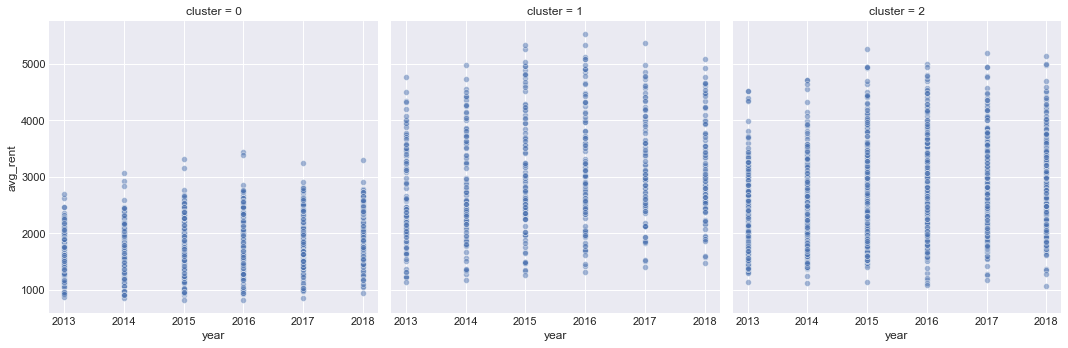

In [393]:
# plot historical rent vs. rent in 1 year by cluster
sns.relplot(data = df_labeled, x ="year", 
                               y = "avg_rent",
                               col = "cluster",
                               alpha = 0.5)

In [394]:
#plot the average rent in time series of three clusters
def plot_cl_features(feature):
    sns.relplot(
        data = df_labeled, 
        x = "year", y = feature, col = "cluster", hue = "cluster", 
        palette = ["b","r","g"], sizes = (10,100),kind = "line")

In [395]:
featureList = list(df_labeled.columns)[5:]
#featureList

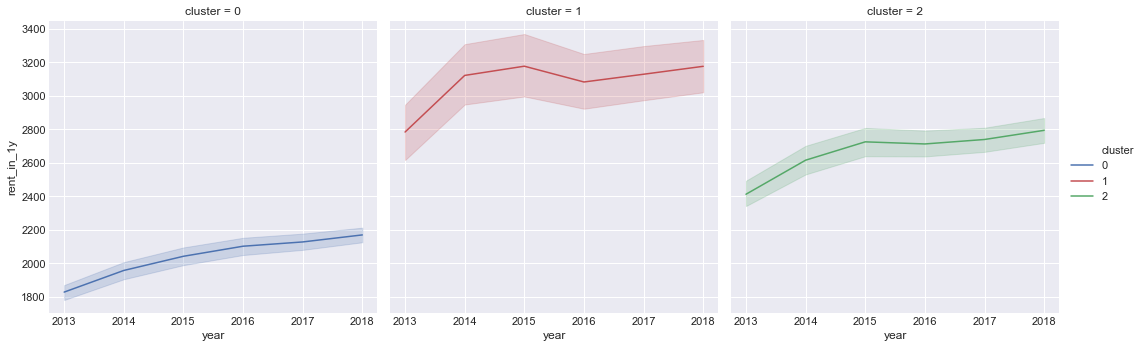

In [398]:
plot_cl_features("rent_in_1y")

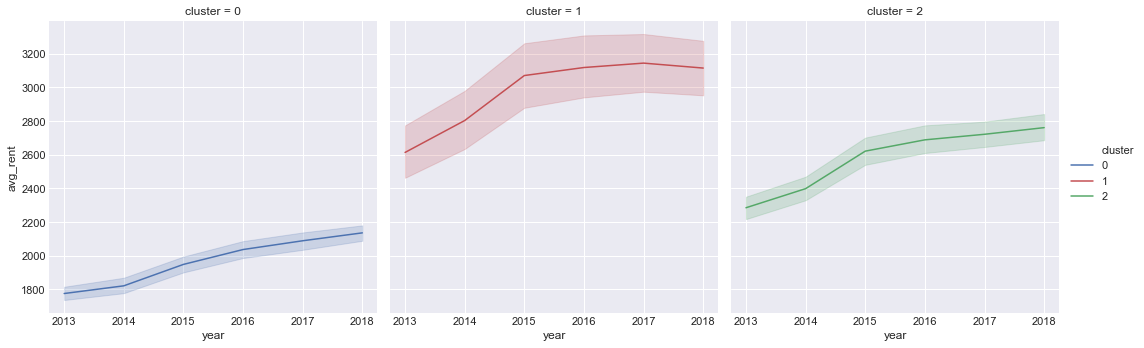

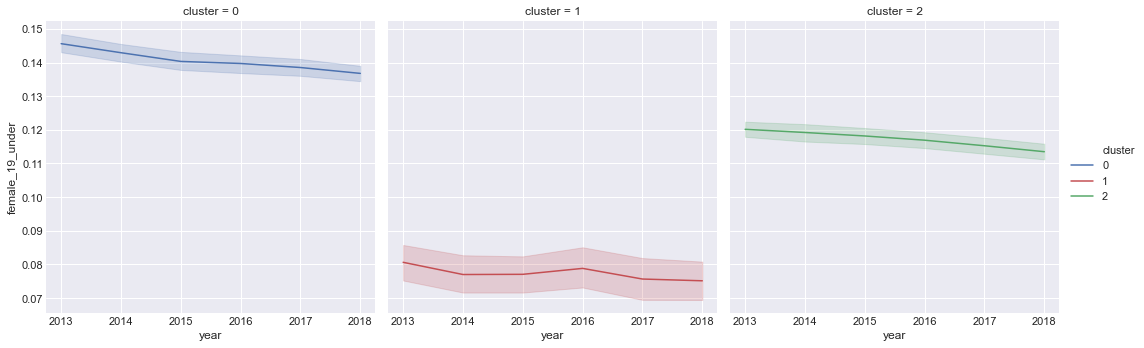

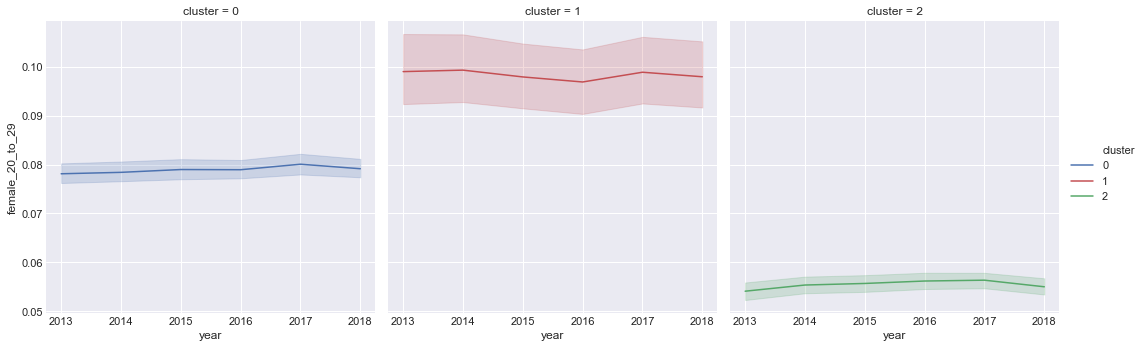

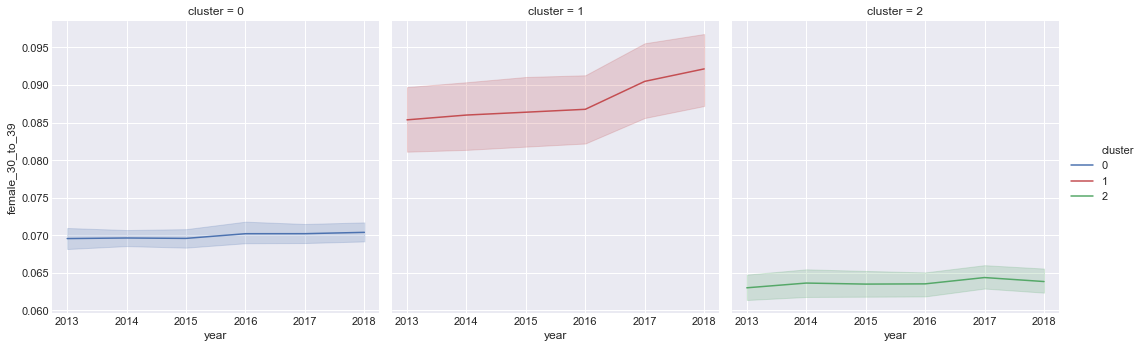

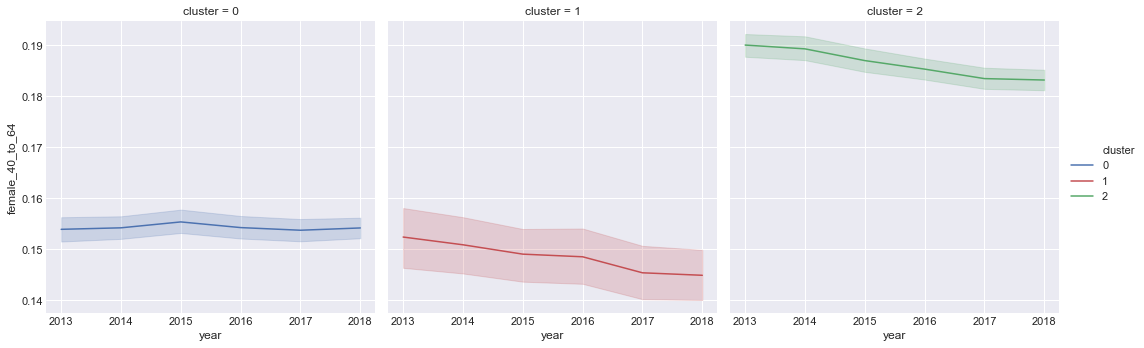

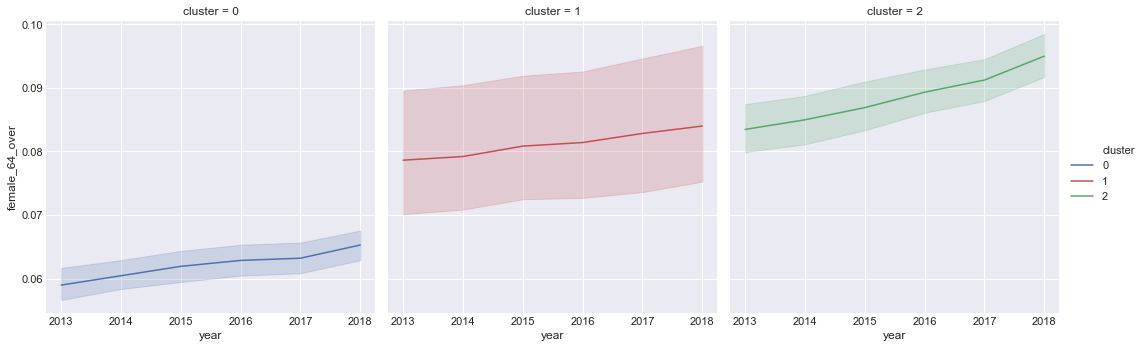

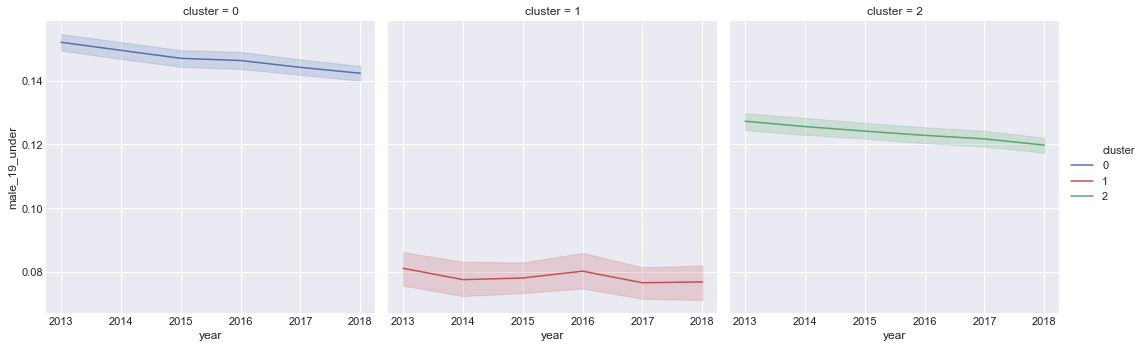

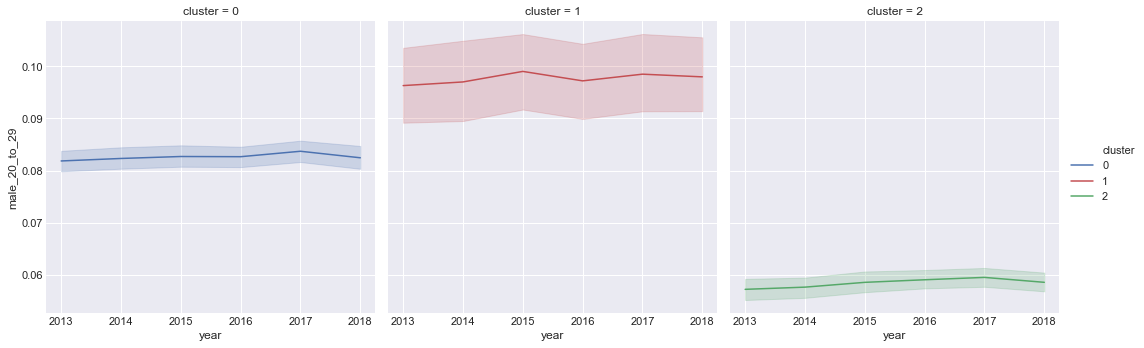

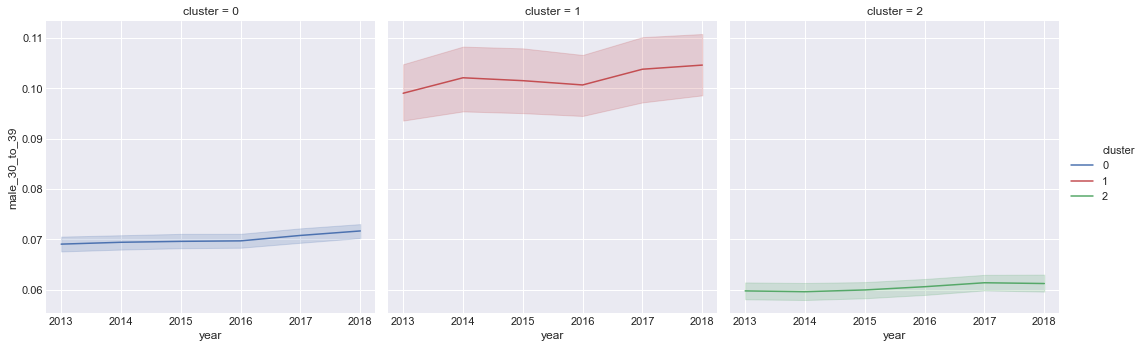

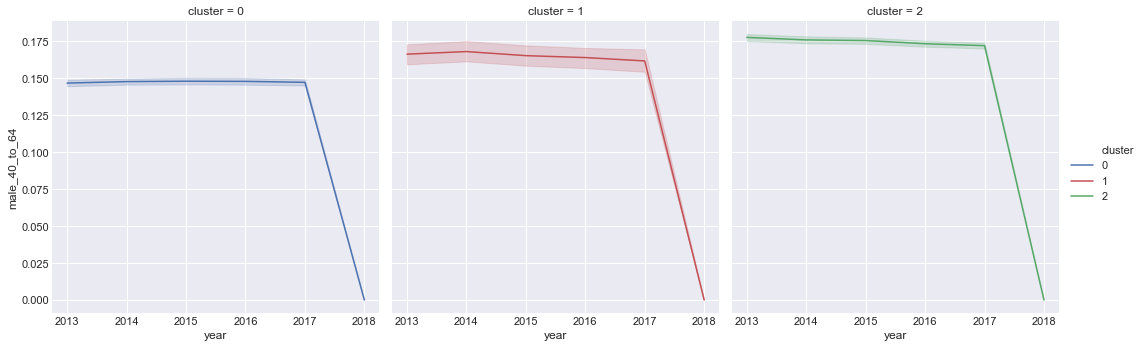

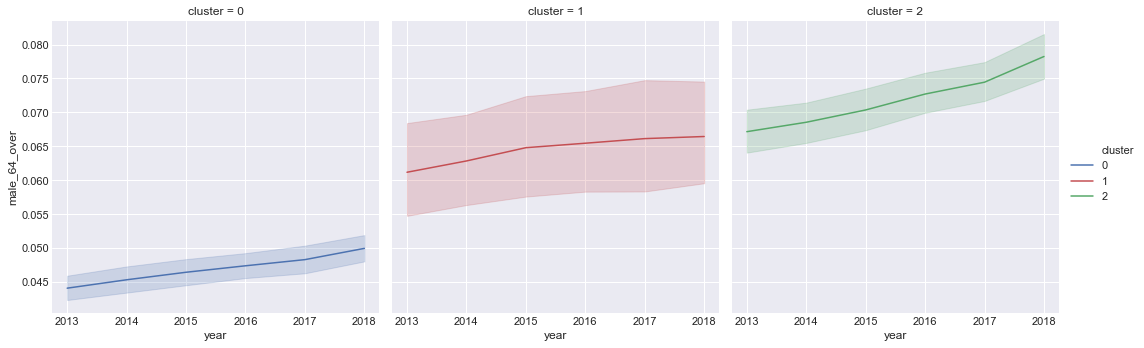

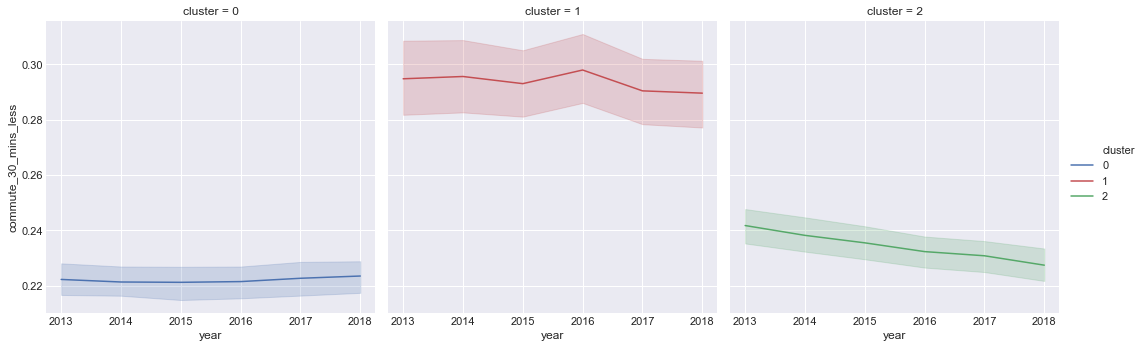

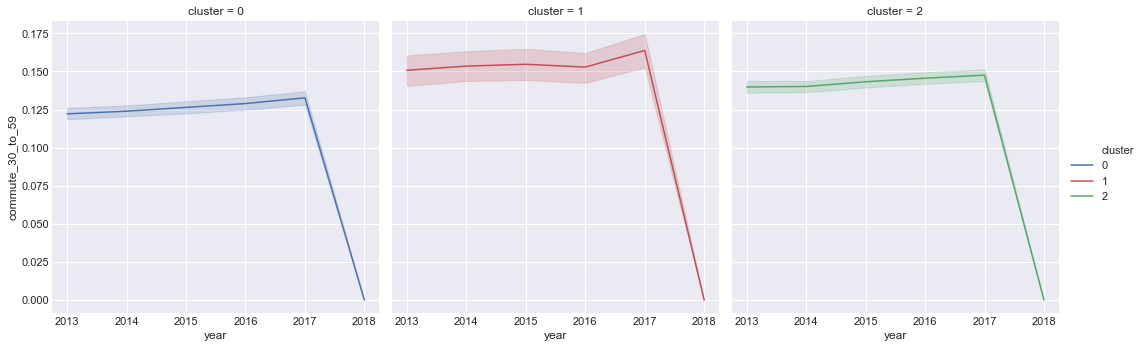

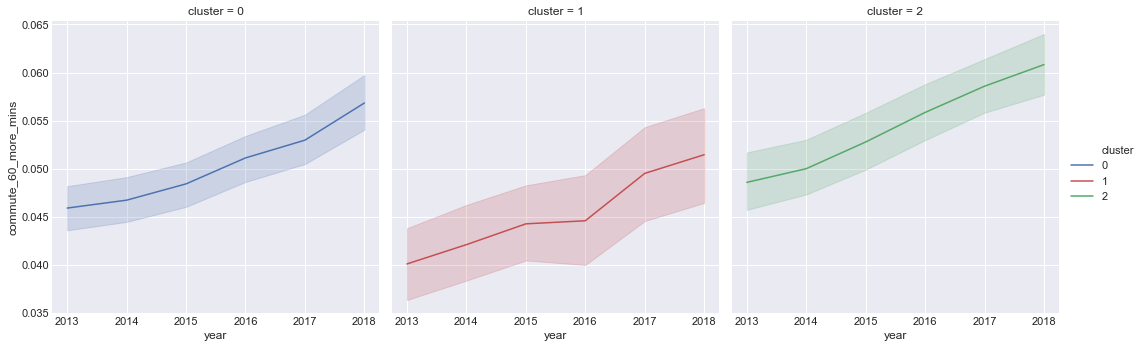

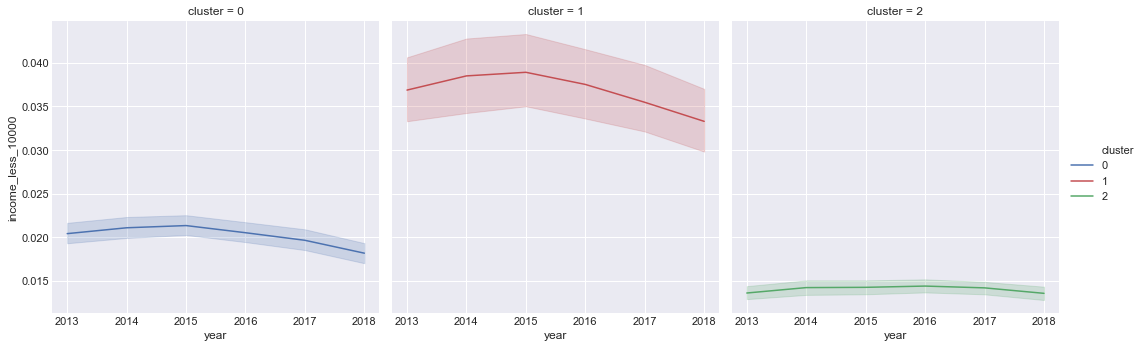

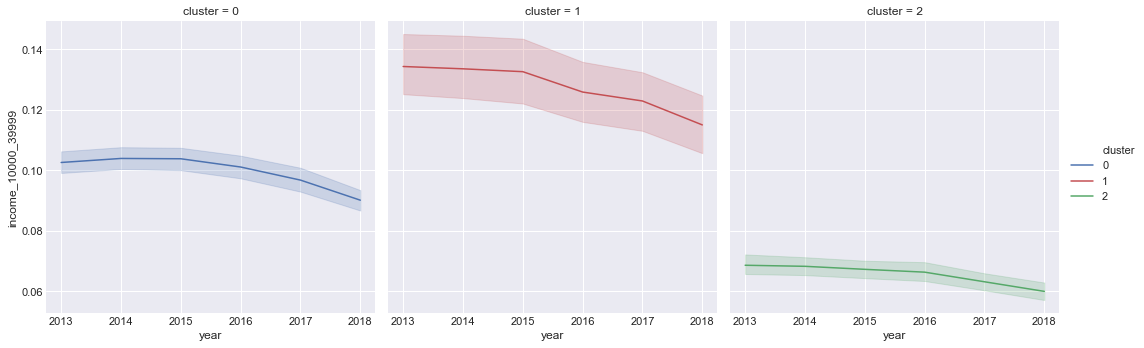

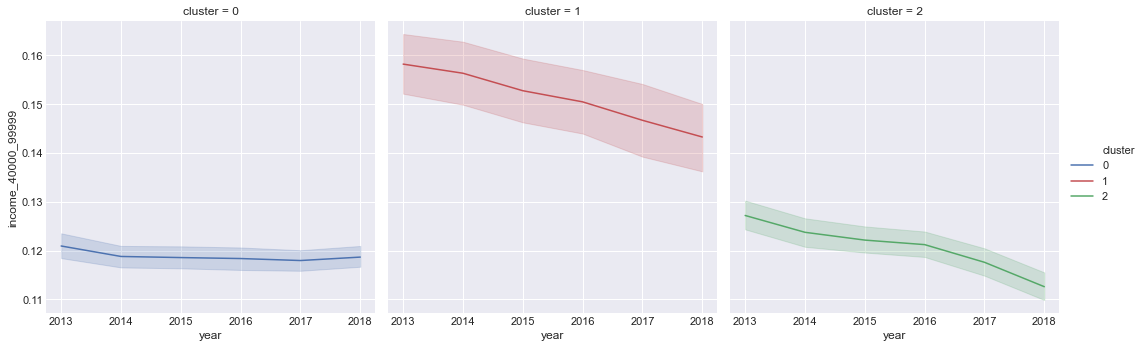

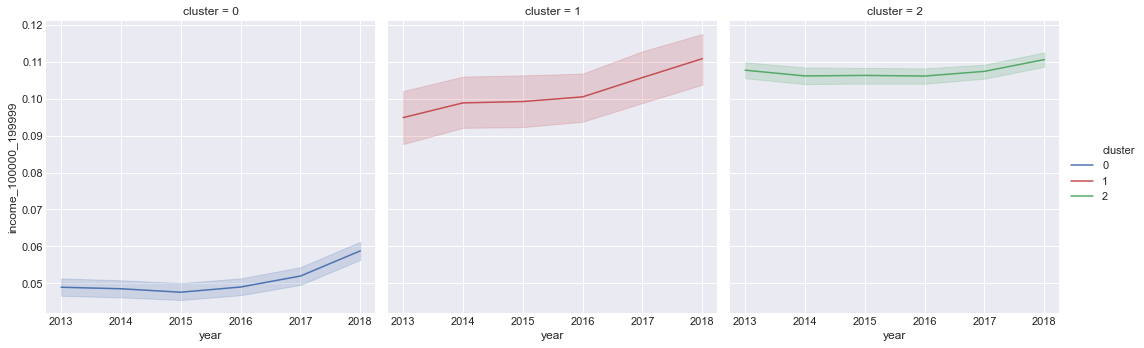

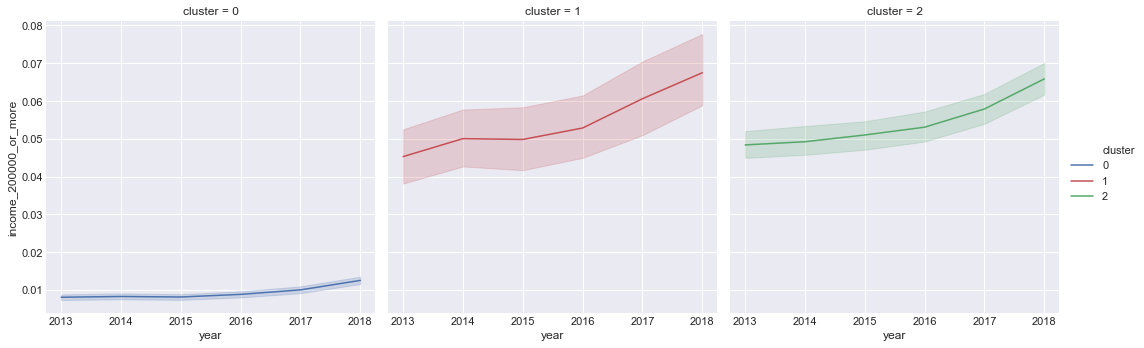

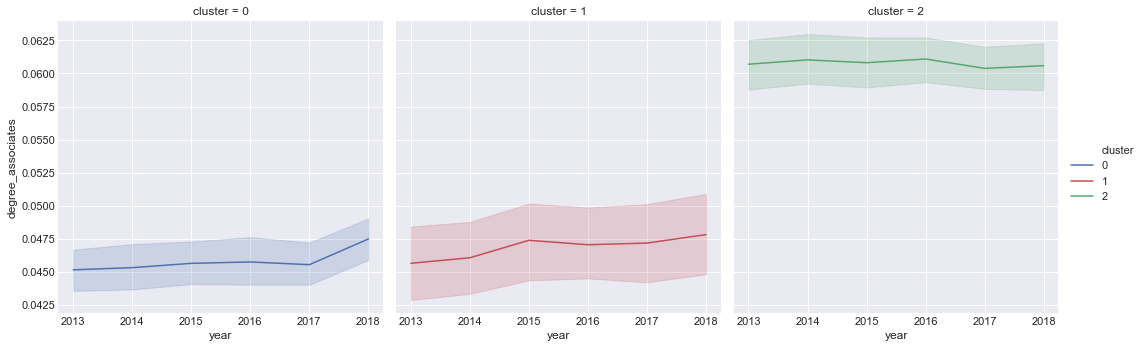

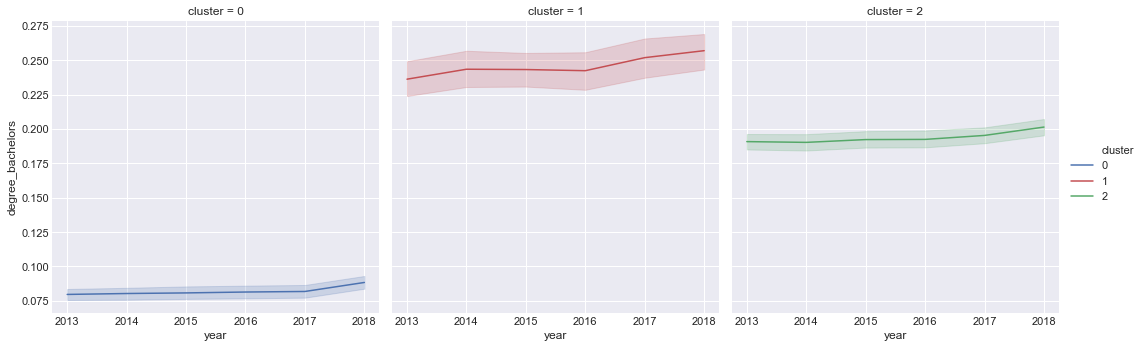

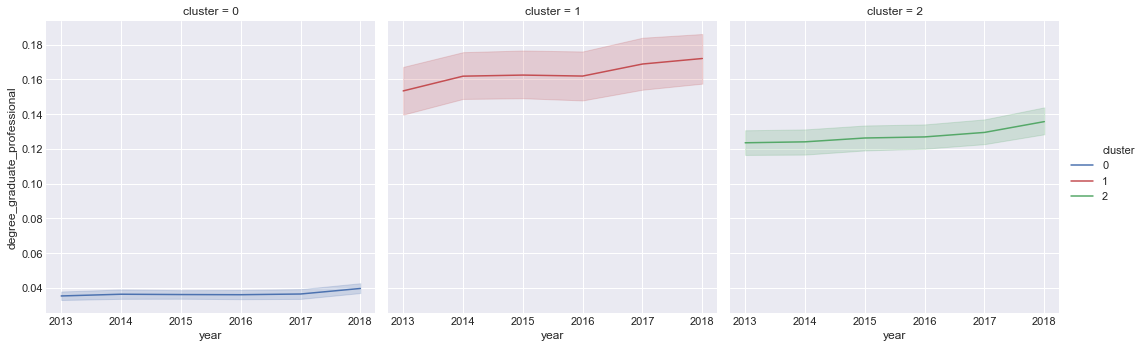

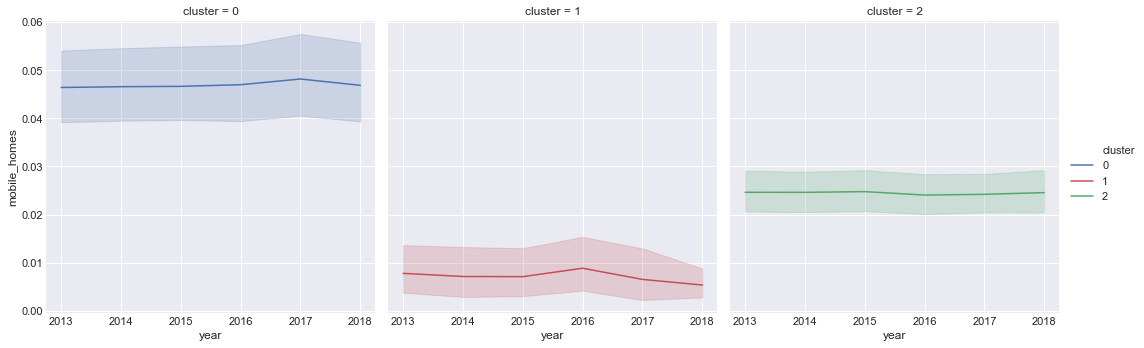

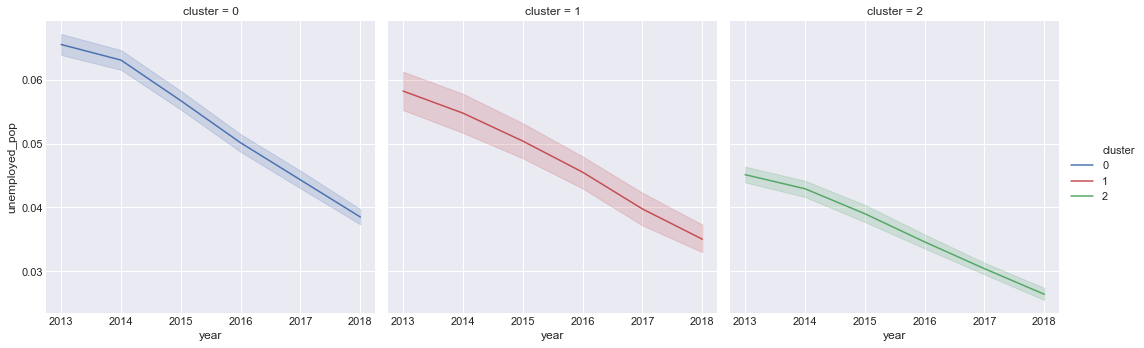

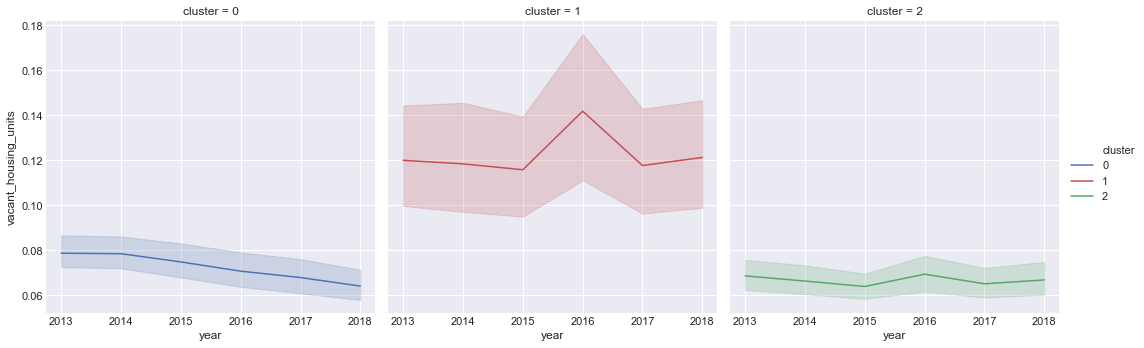

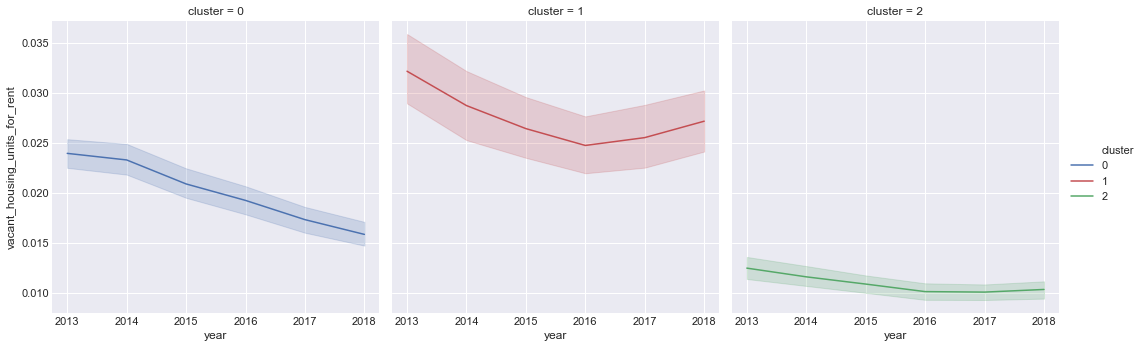

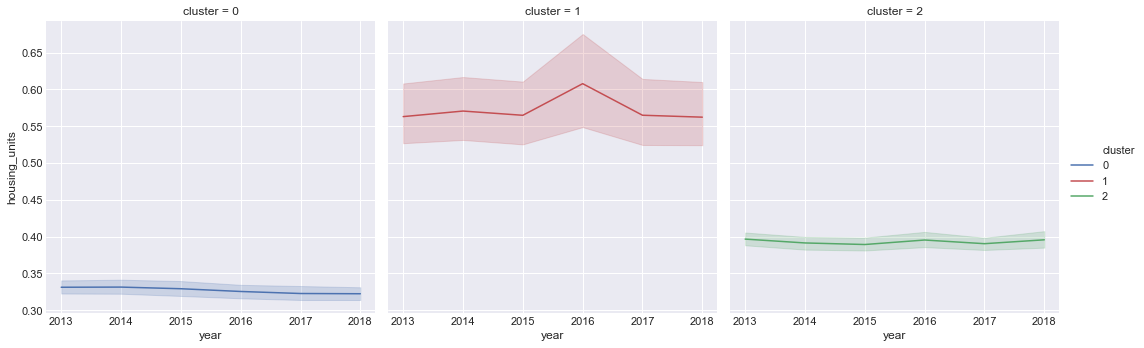

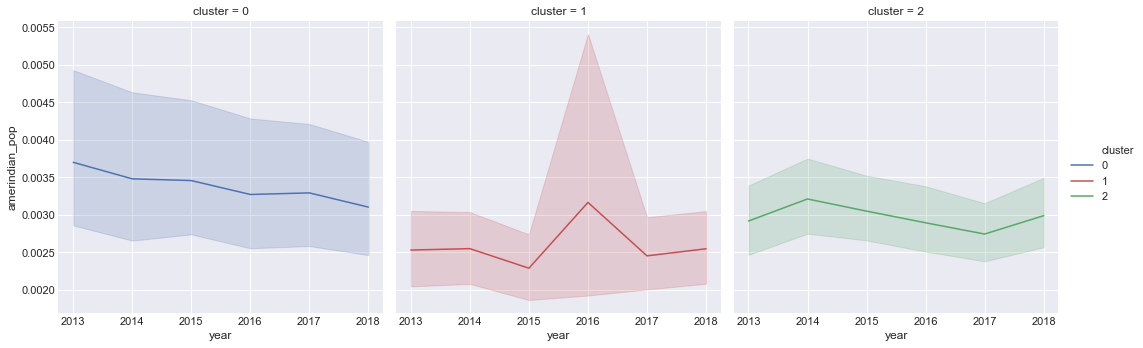

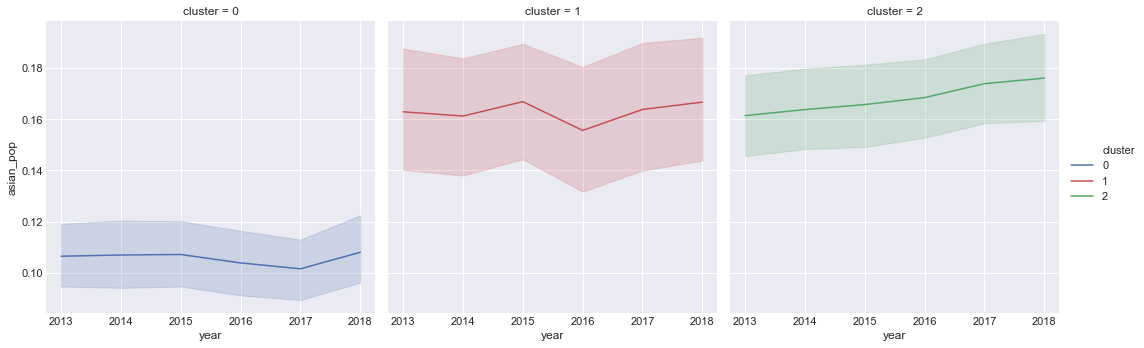

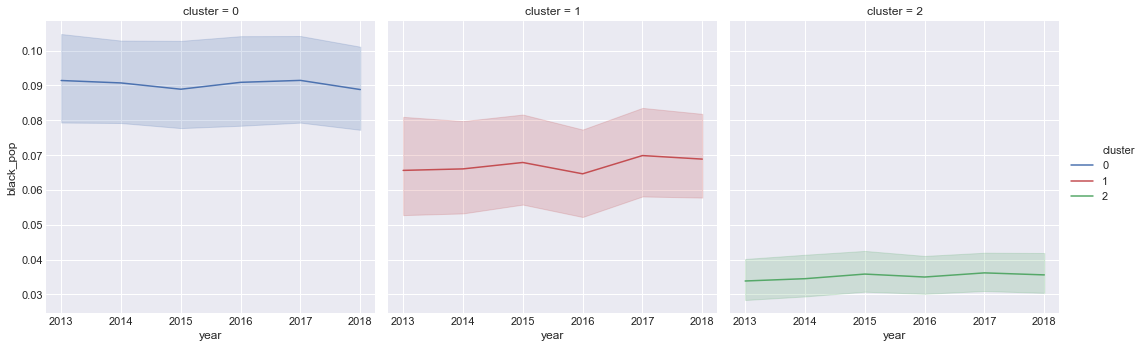

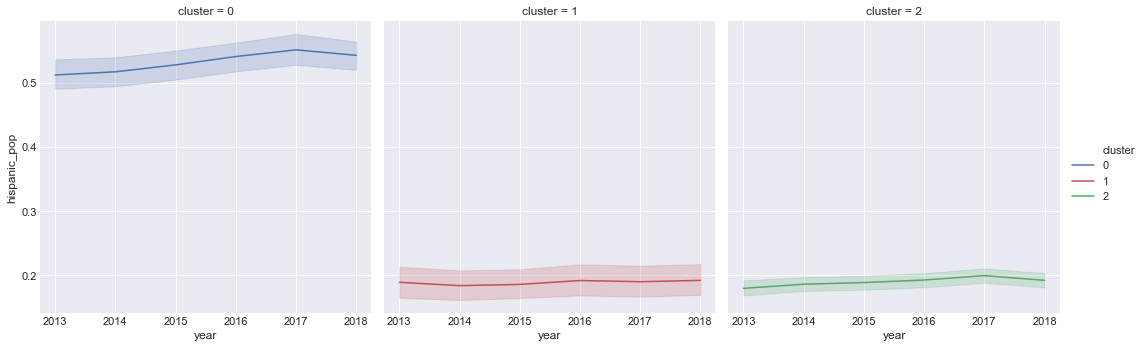

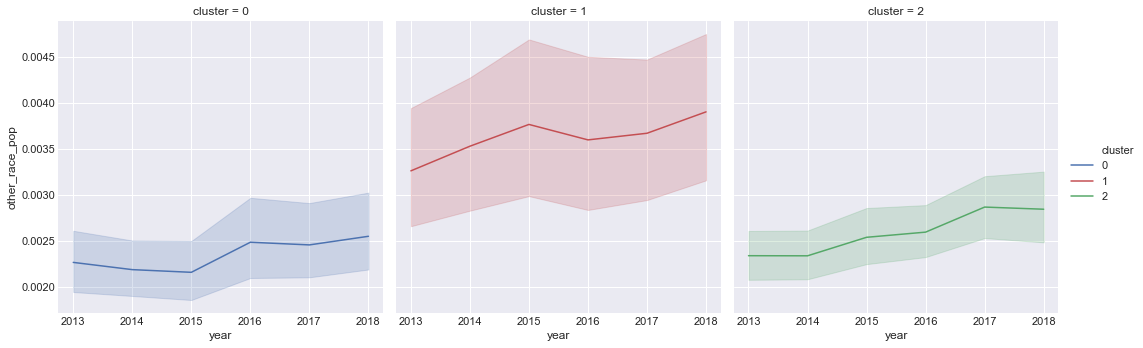

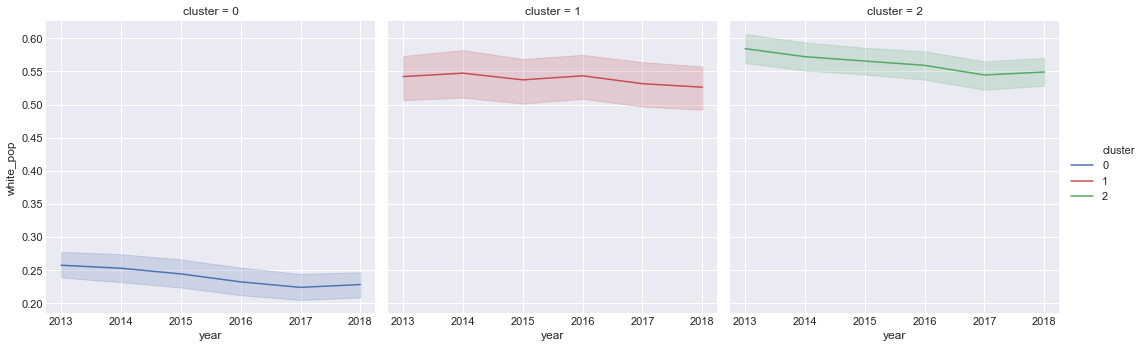

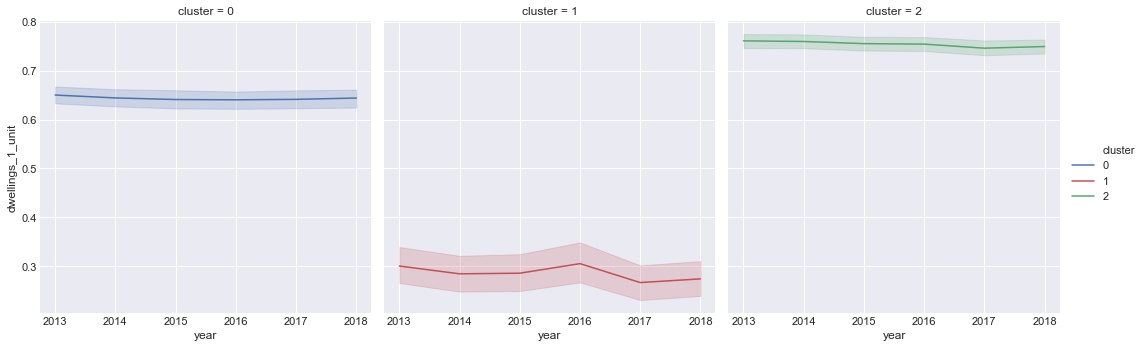

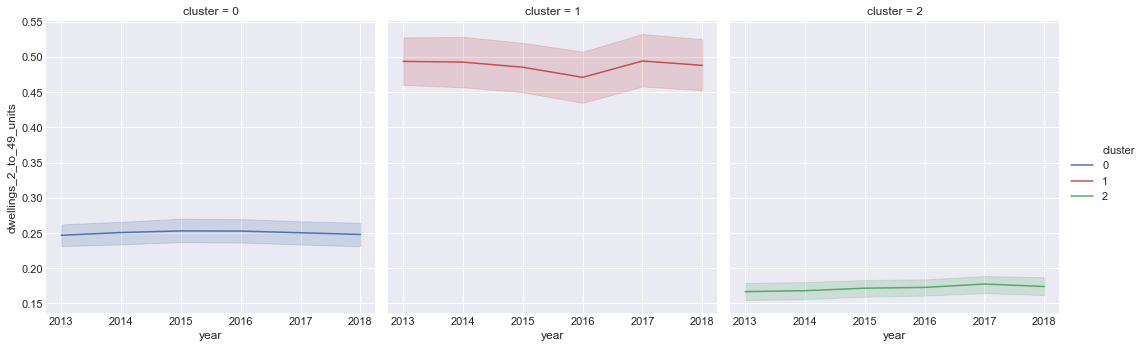

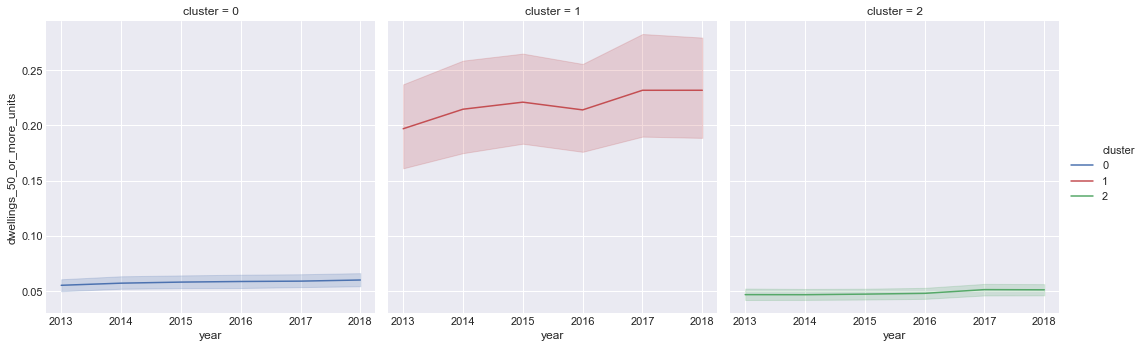

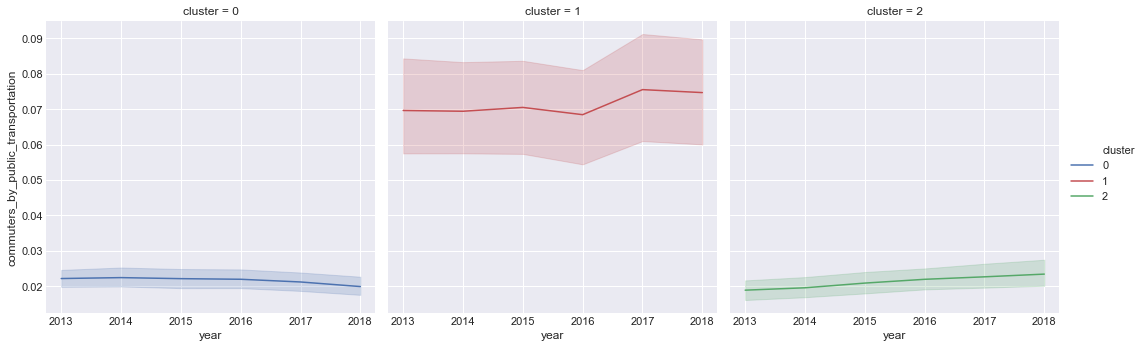

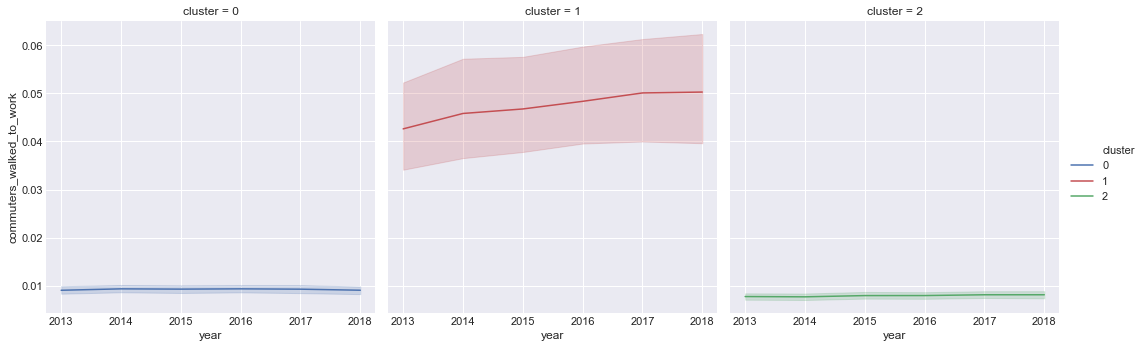

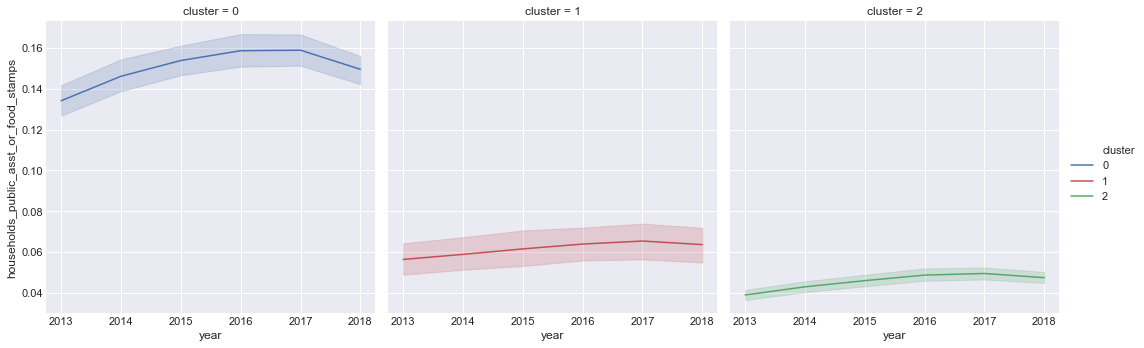

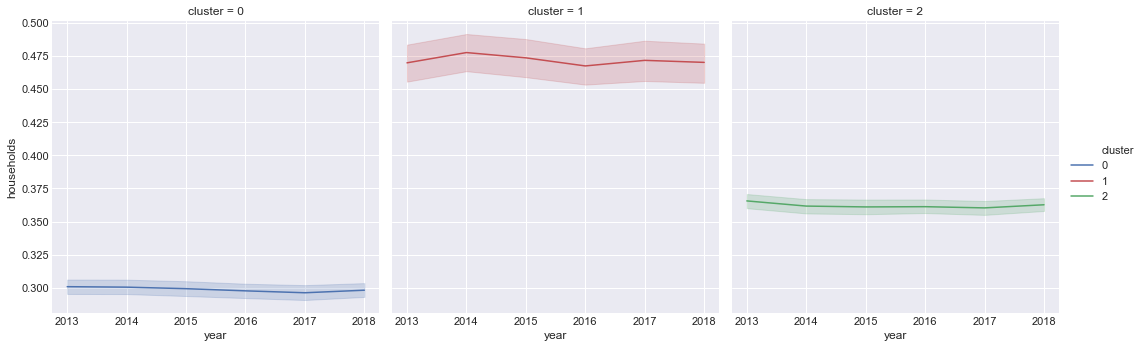

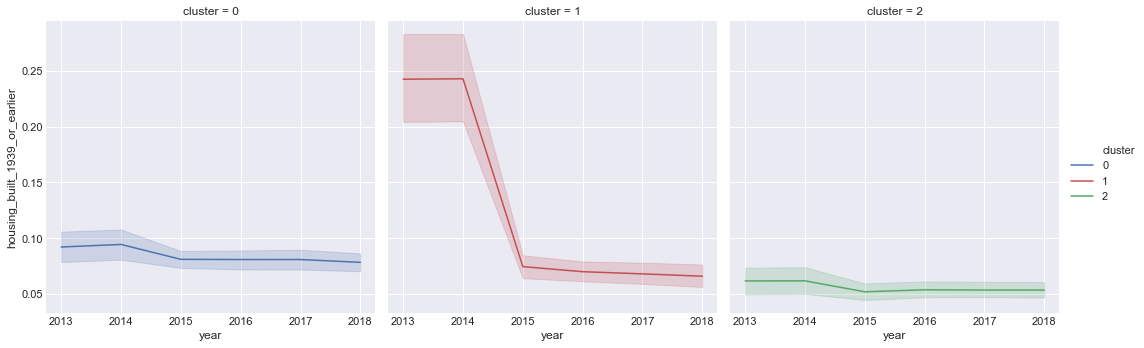

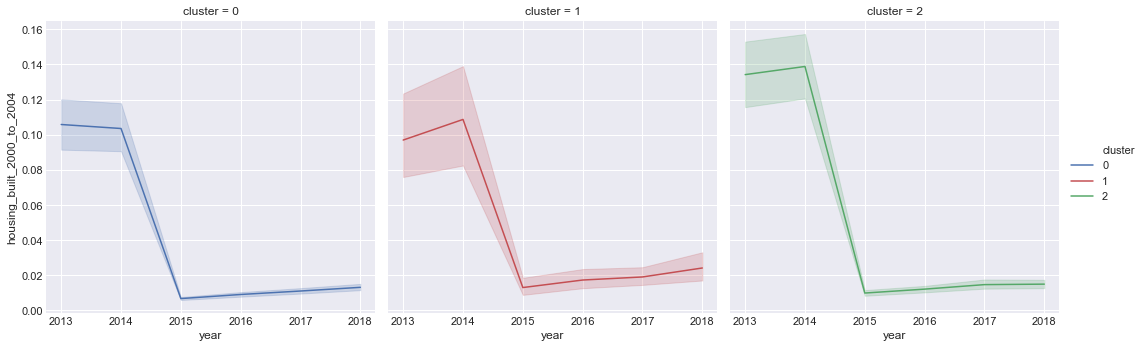

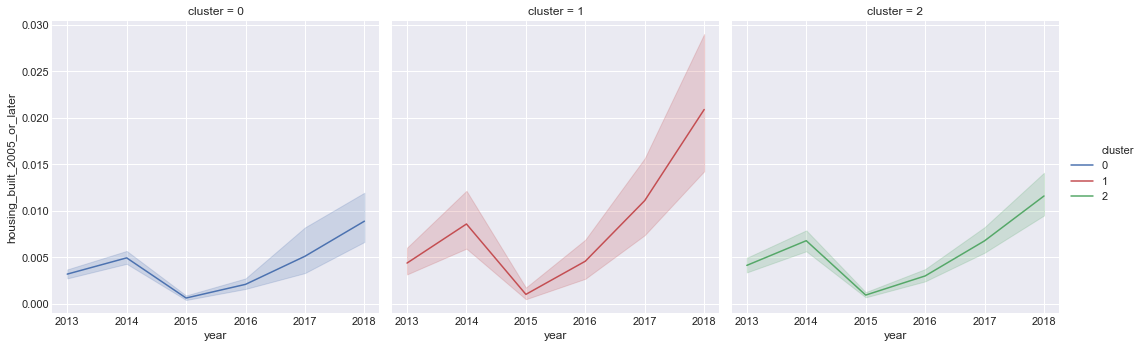

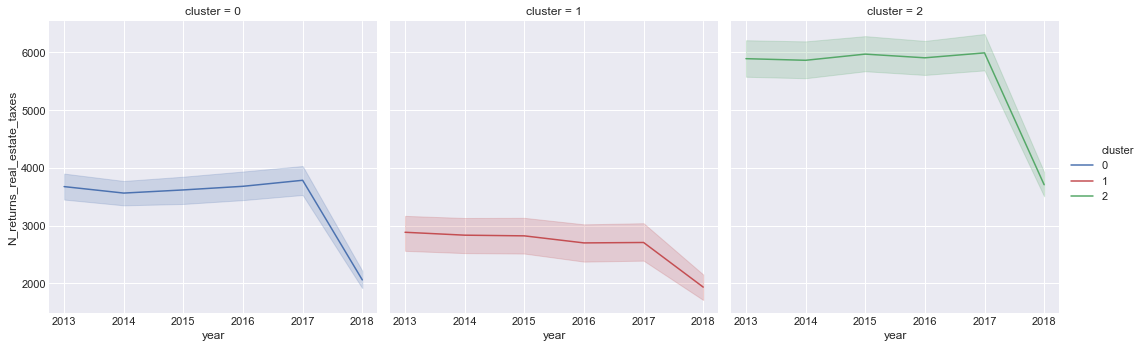

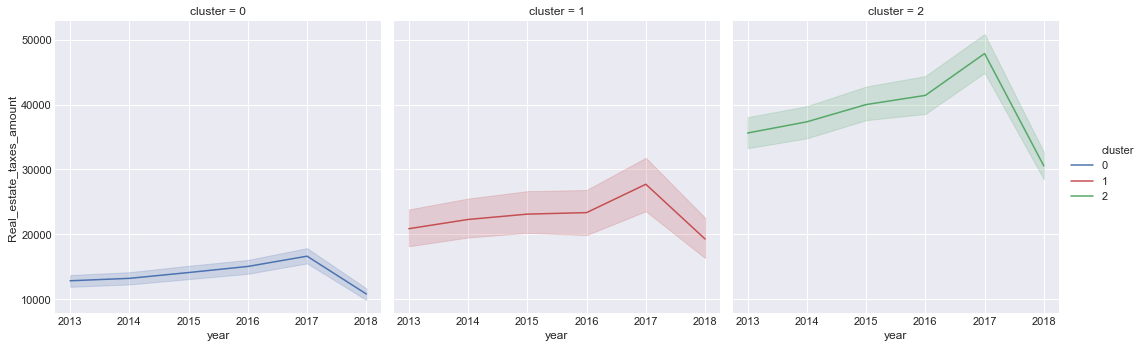

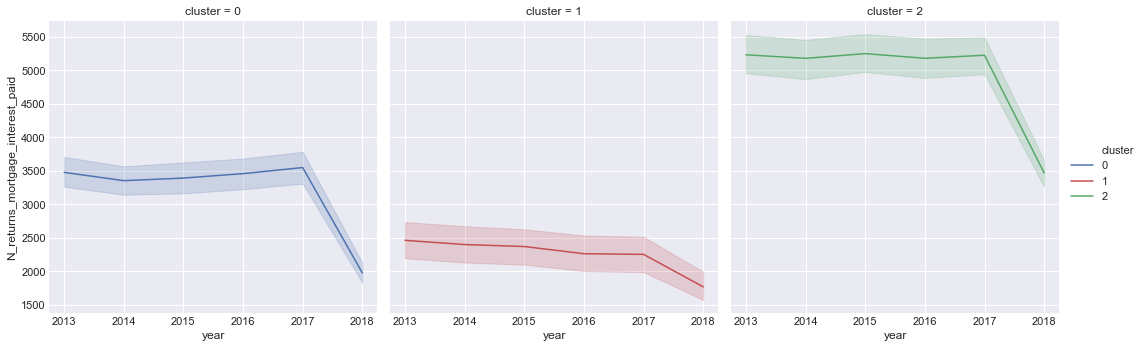

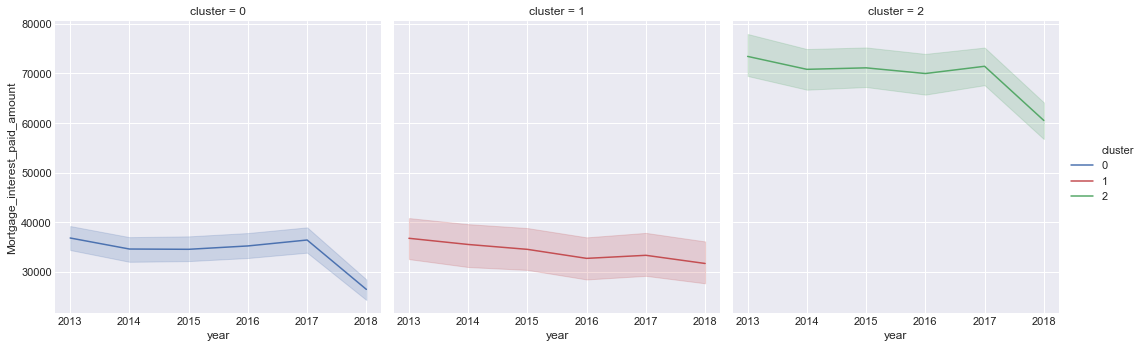

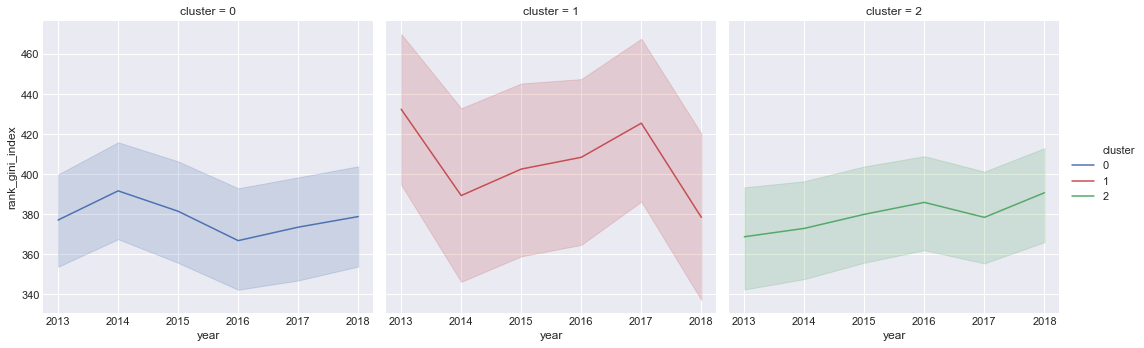

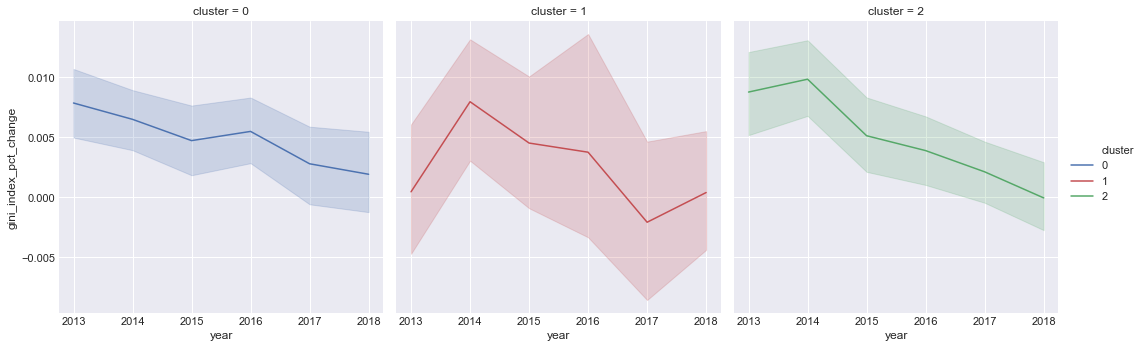

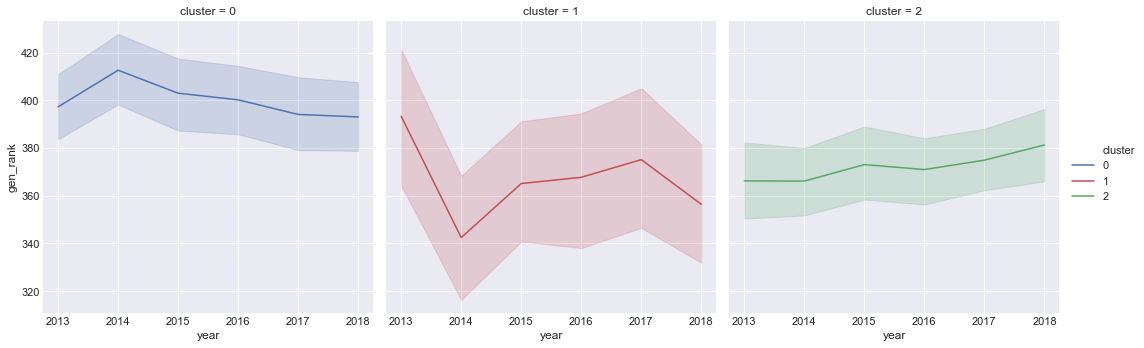

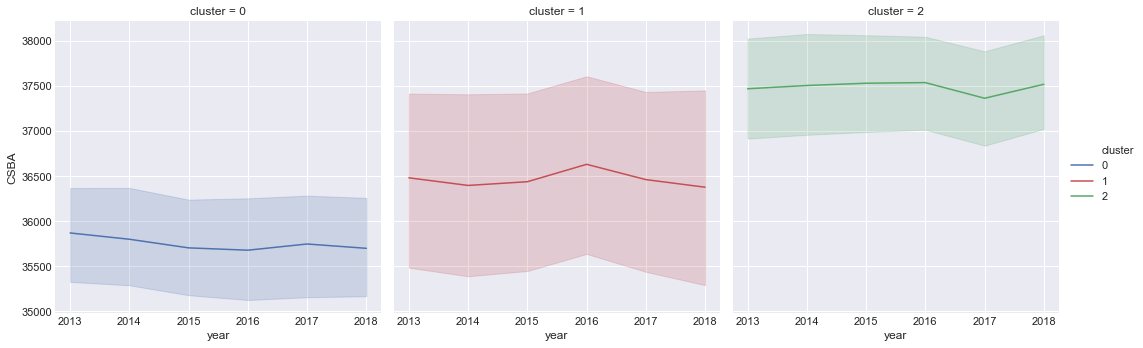

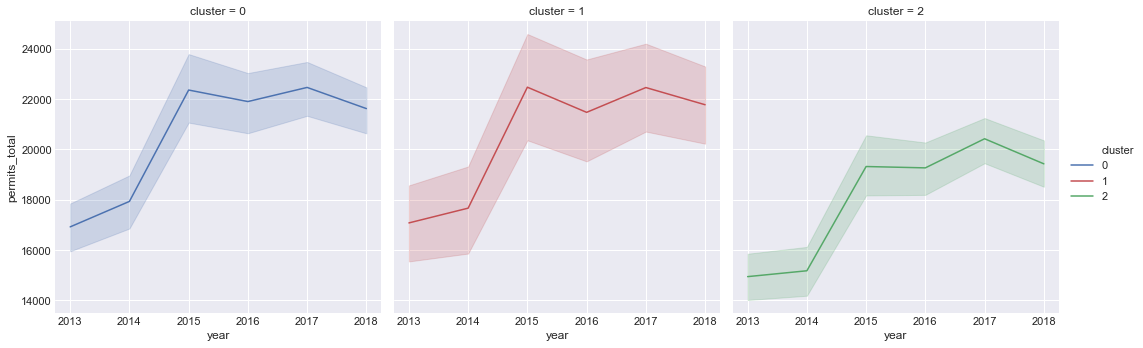

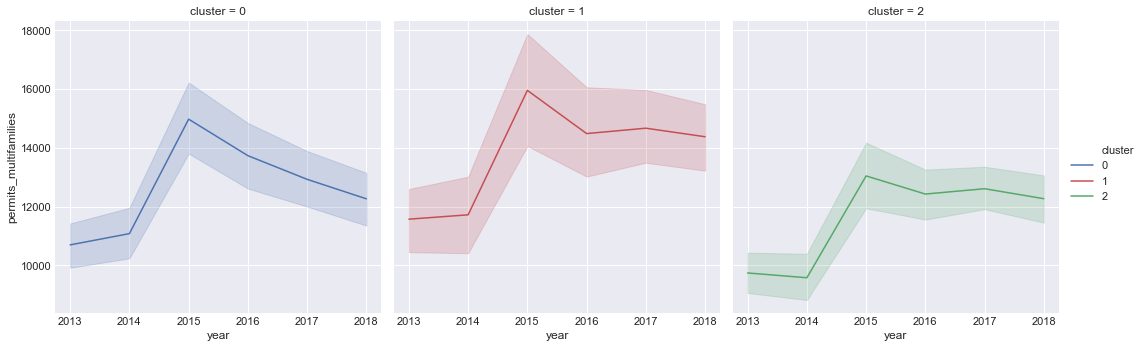

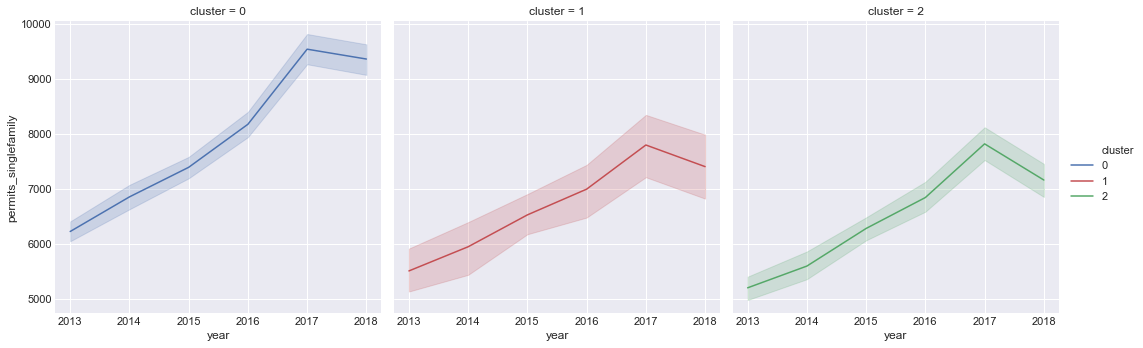

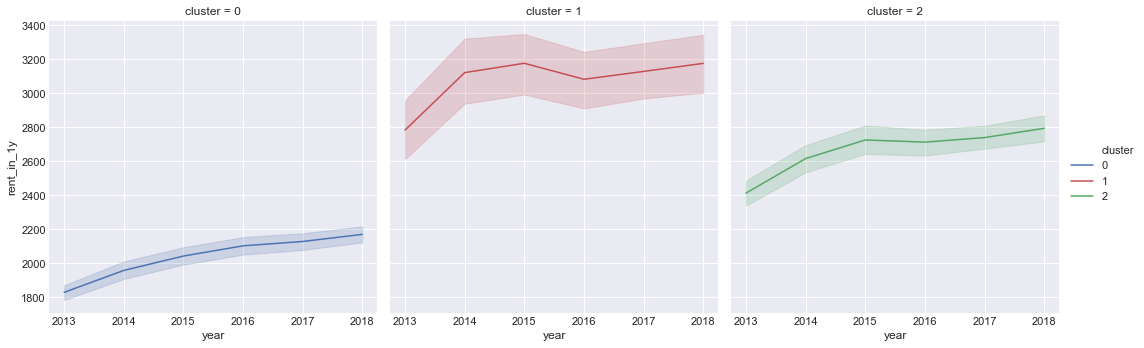

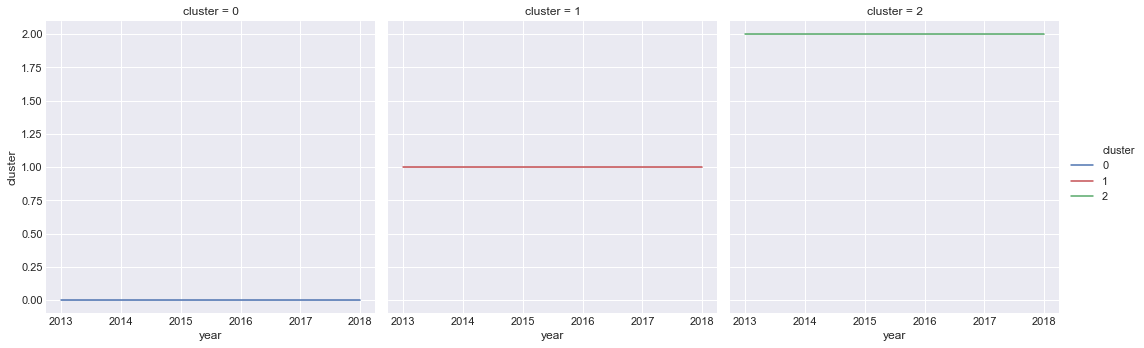

In [396]:
for feature in featureList: 
    plot_cl_features(feature)

In [247]:
def plot_cl(c):
    df_cl_c_wide = df_labeled[df_labeled["cluster"]==c].pivot(index = ['year'],
                                     columns = ['zipcode'], 
                                     values = 'avg_rent')    
   #initialize the figure style
    plt.style.use('seaborn-darkgrid')

    #create a color palette
    palette = plt.get_cmap('Set1')
    zipcode = df_cl_c_wide.shape[1]
    # Set the size of the figure 
    fig,axis = plt.subplots(1,1,figsize = (12,5))
    #plot the lineplot
    plt.plot(df_cl_c_wide, 
           marker = '', color = 'grey', linewidth = 2.4, alpha = 1)
    plt.xlabel('Year')
    plt.ylabel('Average Rent')
    plt.title('Average Rent from 2013 to 2018')
    plt.show()
        
    return plt.show()



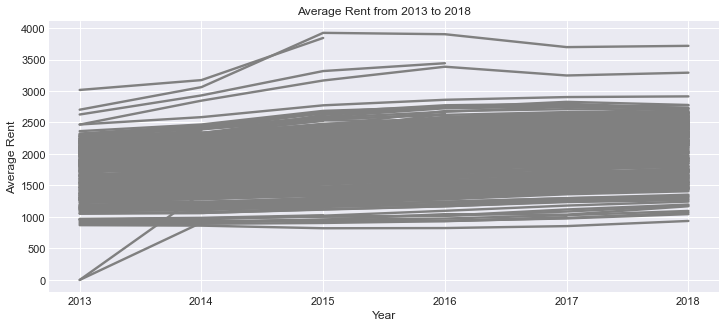

In [220]:
plot_cl(0)

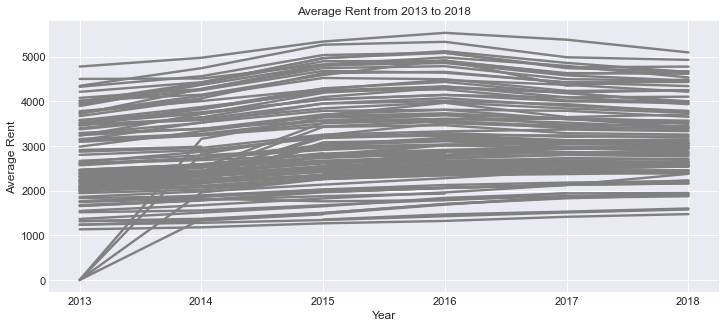

In [221]:
plot_cl(1)
    

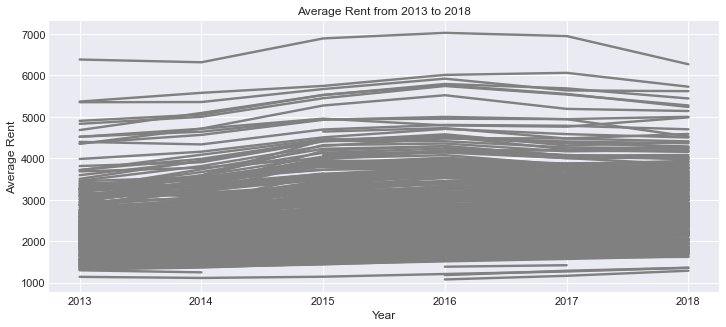

In [222]:
plot_cl(2)

In [84]:
df_c_mean = df_labeled.groupby(["cluster","year"])['avg_rent'].mean().reset_index()   \


,cluster,year,avg_rent
0,0,2013,1767.976933
1,0,2014,1829.452787
2,0,2015,1960.882911
3,0,2016,2042.997149
4,0,2017,2094.519018
5,0,2018,2141.069825
6,1,2013,2521.326348
7,1,2014,2803.545872
8,1,2015,3070.978068
9,1,2016,3118.644281


In [300]:
df_labeled.to_csv("./data/df_final_labed.csv")

In [290]:
df_labeled.head()

,year,zipcode,City,CountyName,Metro,avg_rent,female_19_under,female_20_to_29,female_30_to_39,female_40_to_64,female_64_over,male_19_under,male_20_to_29,male_30_to_39,male_40_to_64,male_64_over,commute_30_mins_less,commute_30_to_59,commute_60_more_mins,income_less_10000,income_10000_39999,income_40000_99999,income_100000_199999,income_200000_or_more,degree_associates,degree_bachelors,degree_graduate_professional,mobile_homes,unemployed_pop,vacant_housing_units,vacant_housing_units_for_rent,housing_units,amerindian_pop,asian_pop,black_pop,hispanic_pop,other_race_pop,white_pop,dwellings_1_unit,dwellings_2_to_49_units,dwellings_50_or_more_units,commuters_by_public_transportation,commuters_walked_to_work,households_public_asst_or_food_stamps,households,housing_built_1939_or_earlier,housing_built_2000_to_2004,housing_built_2005_or_later,N_returns_real_estate_taxes,Real_estate_taxes_amount,N_returns_mortgage_interest_paid,Mortgage_interest_paid_amount,rank_gini_index,gini_index_pct_change,gen_rank,CSBA,permits_total,permits_multifamilies,permits_singlefamily,rent_in_1y,cluster
0,2013,94109,San Francisco,San Francisco County,San Francisco-Oakland-Hayward,3747.083333,0.038311,0.146598,0.098579,0.126137,0.088690,0.036762,0.108071,0.115852,0.171329,0.069670,0.313334,0.179956,0.064014,0.055188,0.169401,0.176768,0.129325,0.070282,0.045408,0.321800,0.184117,0.001031,0.044489,0.094573,0.029824,0.663737,0.000522,0.279346,0.033592,0.102307,0.015526,0.539131,0.034844,0.684668,0.278480,0.225616,0.146130,0.050412,0.600965,0.603528,0.032754,0.000434,4190.0,36728.0,3260.0,48733.0,681.0,-0.025946,533.000000,41860.0,10922.0,7263.0,3659.0,4123.250000,1
1,2014,94109,San Francisco,San Francisco County,San Francisco-Oakland-Hayward,4123.250000,0.028940,0.141141,0.097703,0.127501,0.080996,0.036938,0.109005,0.130222,0.172455,0.075099,0.320278,0.185181,0.069438,0.054430,0.166046,0.169387,0.134294,0.077527,0.042963,0.343595,0.189198,0.000550,0.039348,0.093502,0.023603,0.663745,0.000292,0.271838,0.040553,0.096023,0.010572,0.546304,0.030947,0.685794,0.282185,0.232818,0.151987,0.057992,0.601683,0.592017,0.038842,0.000413,4160.0,39773.0,3190.0,47822.0,474.0,0.000750,254.333333,41860.0,10001.0,6285.0,3716.0,4520.250000,1
2,2015,94109,San Francisco,San Francisco County,San Francisco-Oakland-Hayward,4520.250000,0.029400,0.135949,0.105821,0.123141,0.082728,0.035919,0.106443,0.137299,0.169435,0.073864,0.317038,0.192102,0.075516,0.049811,0.153447,0.172828,0.142238,0.080703,0.041497,0.345052,0.205478,0.000459,0.029720,0.089852,0.018192,0.658164,0.000231,0.267209,0.041604,0.096708,0.009344,0.551276,0.034575,0.679325,0.284885,0.226582,0.156556,0.056226,0.599027,0.047746,0.002969,0.000270,4280.0,43679.0,3230.0,48895.0,315.0,0.010684,239.666667,41860.0,13386.0,8582.0,4804.0,4492.916667,1
3,2016,94109,San Francisco,San Francisco County,San Francisco-Oakland-Hayward,4492.916667,0.027901,0.146379,0.105018,0.120388,0.084793,0.033846,0.103072,0.138453,0.160838,0.079312,0.318446,0.200646,0.078795,0.051643,0.153930,0.159232,0.144879,0.092433,0.038987,0.341795,0.207215,0.000430,0.027616,0.094035,0.025758,0.664614,0.000589,0.258930,0.039897,0.104839,0.006159,0.554883,0.028525,0.675942,0.294432,0.232314,0.160874,0.055559,0.602117,0.051033,0.004781,0.002471,4280.0,48090.0,3210.0,47713.0,299.0,0.010200,303.333333,41860.0,14787.0,9820.0,4967.0,4231.416667,1
4,2017,94109,San Francisco,San Francisco County,San Francisco-Oakland-Hayward,4231.416667,0.026190,0.131302,0.108329,0.122007,0.085002,0.039514,0.099599,0.146801,0.160426,0.080831,0.321540,0.210702,0.073091,0.042660,0.140863,0.148338,0.144609,0.109760,0.032181,0.346846,0.222542,0.000406,0.028452,0.102923,0.030639,0.653489,0.000424,0.255854,0.040115,0.103186,0.006309,0.561754,0.027881,0.686795,0.284296,0.230017,0.177161,0.052332,0.586230,0.046946,0.007464,0.002380,4430.0,59023.0,3370.0,51307.0,578.0,-0.013035,346.666667,41860.0,16952.0,12175.0,4777.0,4245.916667,1


In [401]:
df[df_labeled.groupby('zipcode').nunique()["cluster"] != 1]

NameError: name 'df' is not defined

In [402]:
clst_by_y = df_labeled.pivot(index = 'zipcode',
                 columns = 'year', 
                 values = 'cluster')
clst_by_y = clst_by_y.reset_index()
clst_by_y.columns = [str(column) for column in clst_by_y.columns]
clst_by_y

,zipcode,2013,2014,2015,2016,2017,2018
0,90001,0.0,0.0,0.0,0.0,0.0,0.0
1,90002,0.0,0.0,0.0,0.0,0.0,0.0
2,90003,0.0,0.0,0.0,0.0,0.0,0.0
3,90004,0.0,0.0,0.0,0.0,0.0,0.0
4,90005,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...
750,96143,NaN,NaN,NaN,1.0,NaN,NaN
751,96145,NaN,NaN,NaN,1.0,NaN,NaN
752,96146,1.0,1.0,1.0,1.0,1.0,1.0
753,96148,NaN,NaN,NaN,1.0,NaN,NaN


In [405]:
clst_by_y.to_csv("./data/clst_yr_zipode.csv")

In [404]:

import itertools
l = list(itertools.combinations(clst_by_y.iloc[:,1:], 2))
print(len(l))
l

15


[('2013', '2014'),
 ('2013', '2015'),
 ('2013', '2016'),
 ('2013', '2017'),
 ('2013', '2018'),
 ('2014', '2015'),
 ('2014', '2016'),
 ('2014', '2017'),
 ('2014', '2018'),
 ('2015', '2016'),
 ('2015', '2017'),
 ('2015', '2018'),
 ('2016', '2017'),
 ('2016', '2018'),
 ('2017', '2018')]

In [475]:
df_1 = clst_by_y[list(l[1])]
df_1.columns = ['col1', 'col2']


In [487]:
clst_ = pd.DataFrame()
colDict = dict(zip(list(l[0]), list(l[1])))
df = clst_by_y[list(l[0])].rename(columns=colDict)
for i in range(1,len(l)):
    df_i = clst_by_y[list(l[i])]
    print(df_i)
    df_i.columns=['col1', 'col2']
    print(i)

     2013  2015
0     0.0   0.0
1     0.0   0.0
2     0.0   0.0
3     0.0   0.0
4     1.0   1.0
..    ...   ...
750   NaN   NaN
751   NaN   NaN
752   1.0   1.0
753   NaN   NaN
754   1.0   1.0

[755 rows x 2 columns]
1
     2013  2016
0     0.0   0.0
1     0.0   0.0
2     0.0   0.0
3     0.0   0.0
4     1.0   1.0
..    ...   ...
750   NaN   1.0
751   NaN   1.0
752   1.0   1.0
753   NaN   1.0
754   1.0   1.0

[755 rows x 2 columns]
2
     2013  2017
0     0.0   0.0
1     0.0   0.0
2     0.0   0.0
3     0.0   0.0
4     1.0   1.0
..    ...   ...
750   NaN   NaN
751   NaN   NaN
752   1.0   1.0
753   NaN   NaN
754   1.0   1.0

[755 rows x 2 columns]
3
     2013  2018
0     0.0   0.0
1     0.0   0.0
2     0.0   0.0
3     0.0   0.0
4     1.0   1.0
..    ...   ...
750   NaN   NaN
751   NaN   NaN
752   1.0   1.0
753   NaN   NaN
754   1.0   1.0

[755 rows x 2 columns]
4
     2014  2015
0     0.0   0.0
1     0.0   0.0
2     0.0   0.0
3     0.0   0.0
4     1.0   1.0
..    ...   ...
750   NaN   NaN


In [489]:
df_2


NameError: name 'df_2' is not defined

In [463]:
n = len(l)
df = pd.DataFrame()
for i in range(n):
    clst_ = pd.DataFrame()
    b = i+1
    colDict = dict(zip(list(l[i]), list(l[b])))
    df = clst_by_y[list(l[i])].rename(columns=colDict)
    df_next = clst_by_y[list(l[b])]
    df = pd.concat([df,df_next])
    
  



IndexError: list index out of range

In [399]:
# compare cluster assignments to check if zipcodes are assigned to different clusters in different years
clst_1 = pd.DataFrame()
for c in range(len(l)): 
    clst0 = pd.DataFrame()
    cols = pd.DataFrame()
    cols = clst_by_y[list(l[c])]
    clst0 = pd.concat([clst_by_y[['zipcode']],cols ], axis = 1)
    clst1 = pd.concat([clst_1, clst0])
    


""


In [299]:
# #This feature set includes the autoregressive variable avg_rent
# X_ar = df_labeled.drop(['rent_in_1y', 'City','CountyName', 'Metro'], axis = 1)
# #This feature removes the autoregressive variable
# X_labeled = df_labeled.drop(['avg_rent','rent_in_1y', 'City', 'CountyName','Metro'], axis = 1)

# y_labeled = df_labeled['rent_in_1y']

# from sklearn.model_selection import TimeSeriesSplit
# from sklearn.metrics import mean_squared_error
# n_splits = 5
# tscv = TimeSeriesSplit(gap = 0, maX_ar_train_size = None, n_splits = n_splits, test_size = None)
# for train_index,test_index in tscv.split(X):
#     X_labeled_train, X_labeled_test = X_labeled.values[train_index], X_labeled.values[test_index]
#     y_labeled_train, y_test = y_labeled.values[train_index], y_labeled.values[test_index]

TypeError: __init__() got an unexpected keyword argument 'maX_ar_train_size'

In [ ]:
for train_index,test_index in tscv.split(X):
    print("%s %s" % (train_index, test_index))